# SALES EDA AND TIME SERIES ANALYSIS

## A. Exploratory Data Analysis (EDA)

### Setup and Data Loading

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Configure global plot settings
plt.style.use('ggplot')  # Plotting style
sns.set_palette("husl")  # Color palette
plt.rcParams['figure.figsize'] = (12, 6)  # Default figure size
%config InlineBackend.figure_format = 'retina'  # Higher resolution plots



### Data Loading and Initial Inspection

In [4]:
# Load dataset and perform initial checks
df = pd.read_csv('train.csv')

In [5]:
# Display basic dataset info
print("="*50)
print("Dataset Information:")
print("="*50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   

In [6]:
# Show summary statistics
print("\n" + "="*50)
print("Descriptive Statistics:")
print("="*50)
print(df.describe().T)


Descriptive Statistics:
              count          mean           std       min        25%  \
Row ID       9800.0   4900.500000   2829.160653     1.000   2450.750   
Postal Code  9789.0  55273.322403  32041.223413  1040.000  23223.000   
Sales        9800.0    230.769059    626.651875     0.444     17.248   

                  50%        75%       max  
Row ID        4900.50   7350.250   9800.00  
Postal Code  58103.00  90008.000  99301.00  
Sales           54.49    210.605  22638.48  


### Data Cleaning and Preprocessing

In [7]:
# Remove unnecessary columns
df.drop('Row ID', axis=1, inplace=True)  # Drop redundant column

In [8]:
# Convert date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [9]:
# Sort data chronologically and set index
df = df.sort_values(by='Order Date', ascending=True)
df.set_index('Order Date', inplace=True)

In [10]:
# Handle missing values in Postal Code
print("\nMissing values before cleaning:", df.isnull().sum().sum())
 # Verified external data source
burlington_zip = 5401
df['Postal Code'] = df['Postal Code'].fillna(burlington_zip)
print("Missing values after cleaning:", df.isnull().sum().sum())


Missing values before cleaning: 11
Missing values after cleaning: 0


### 1. Customer Analysis

#### 1.1 Top Customers by Revenue

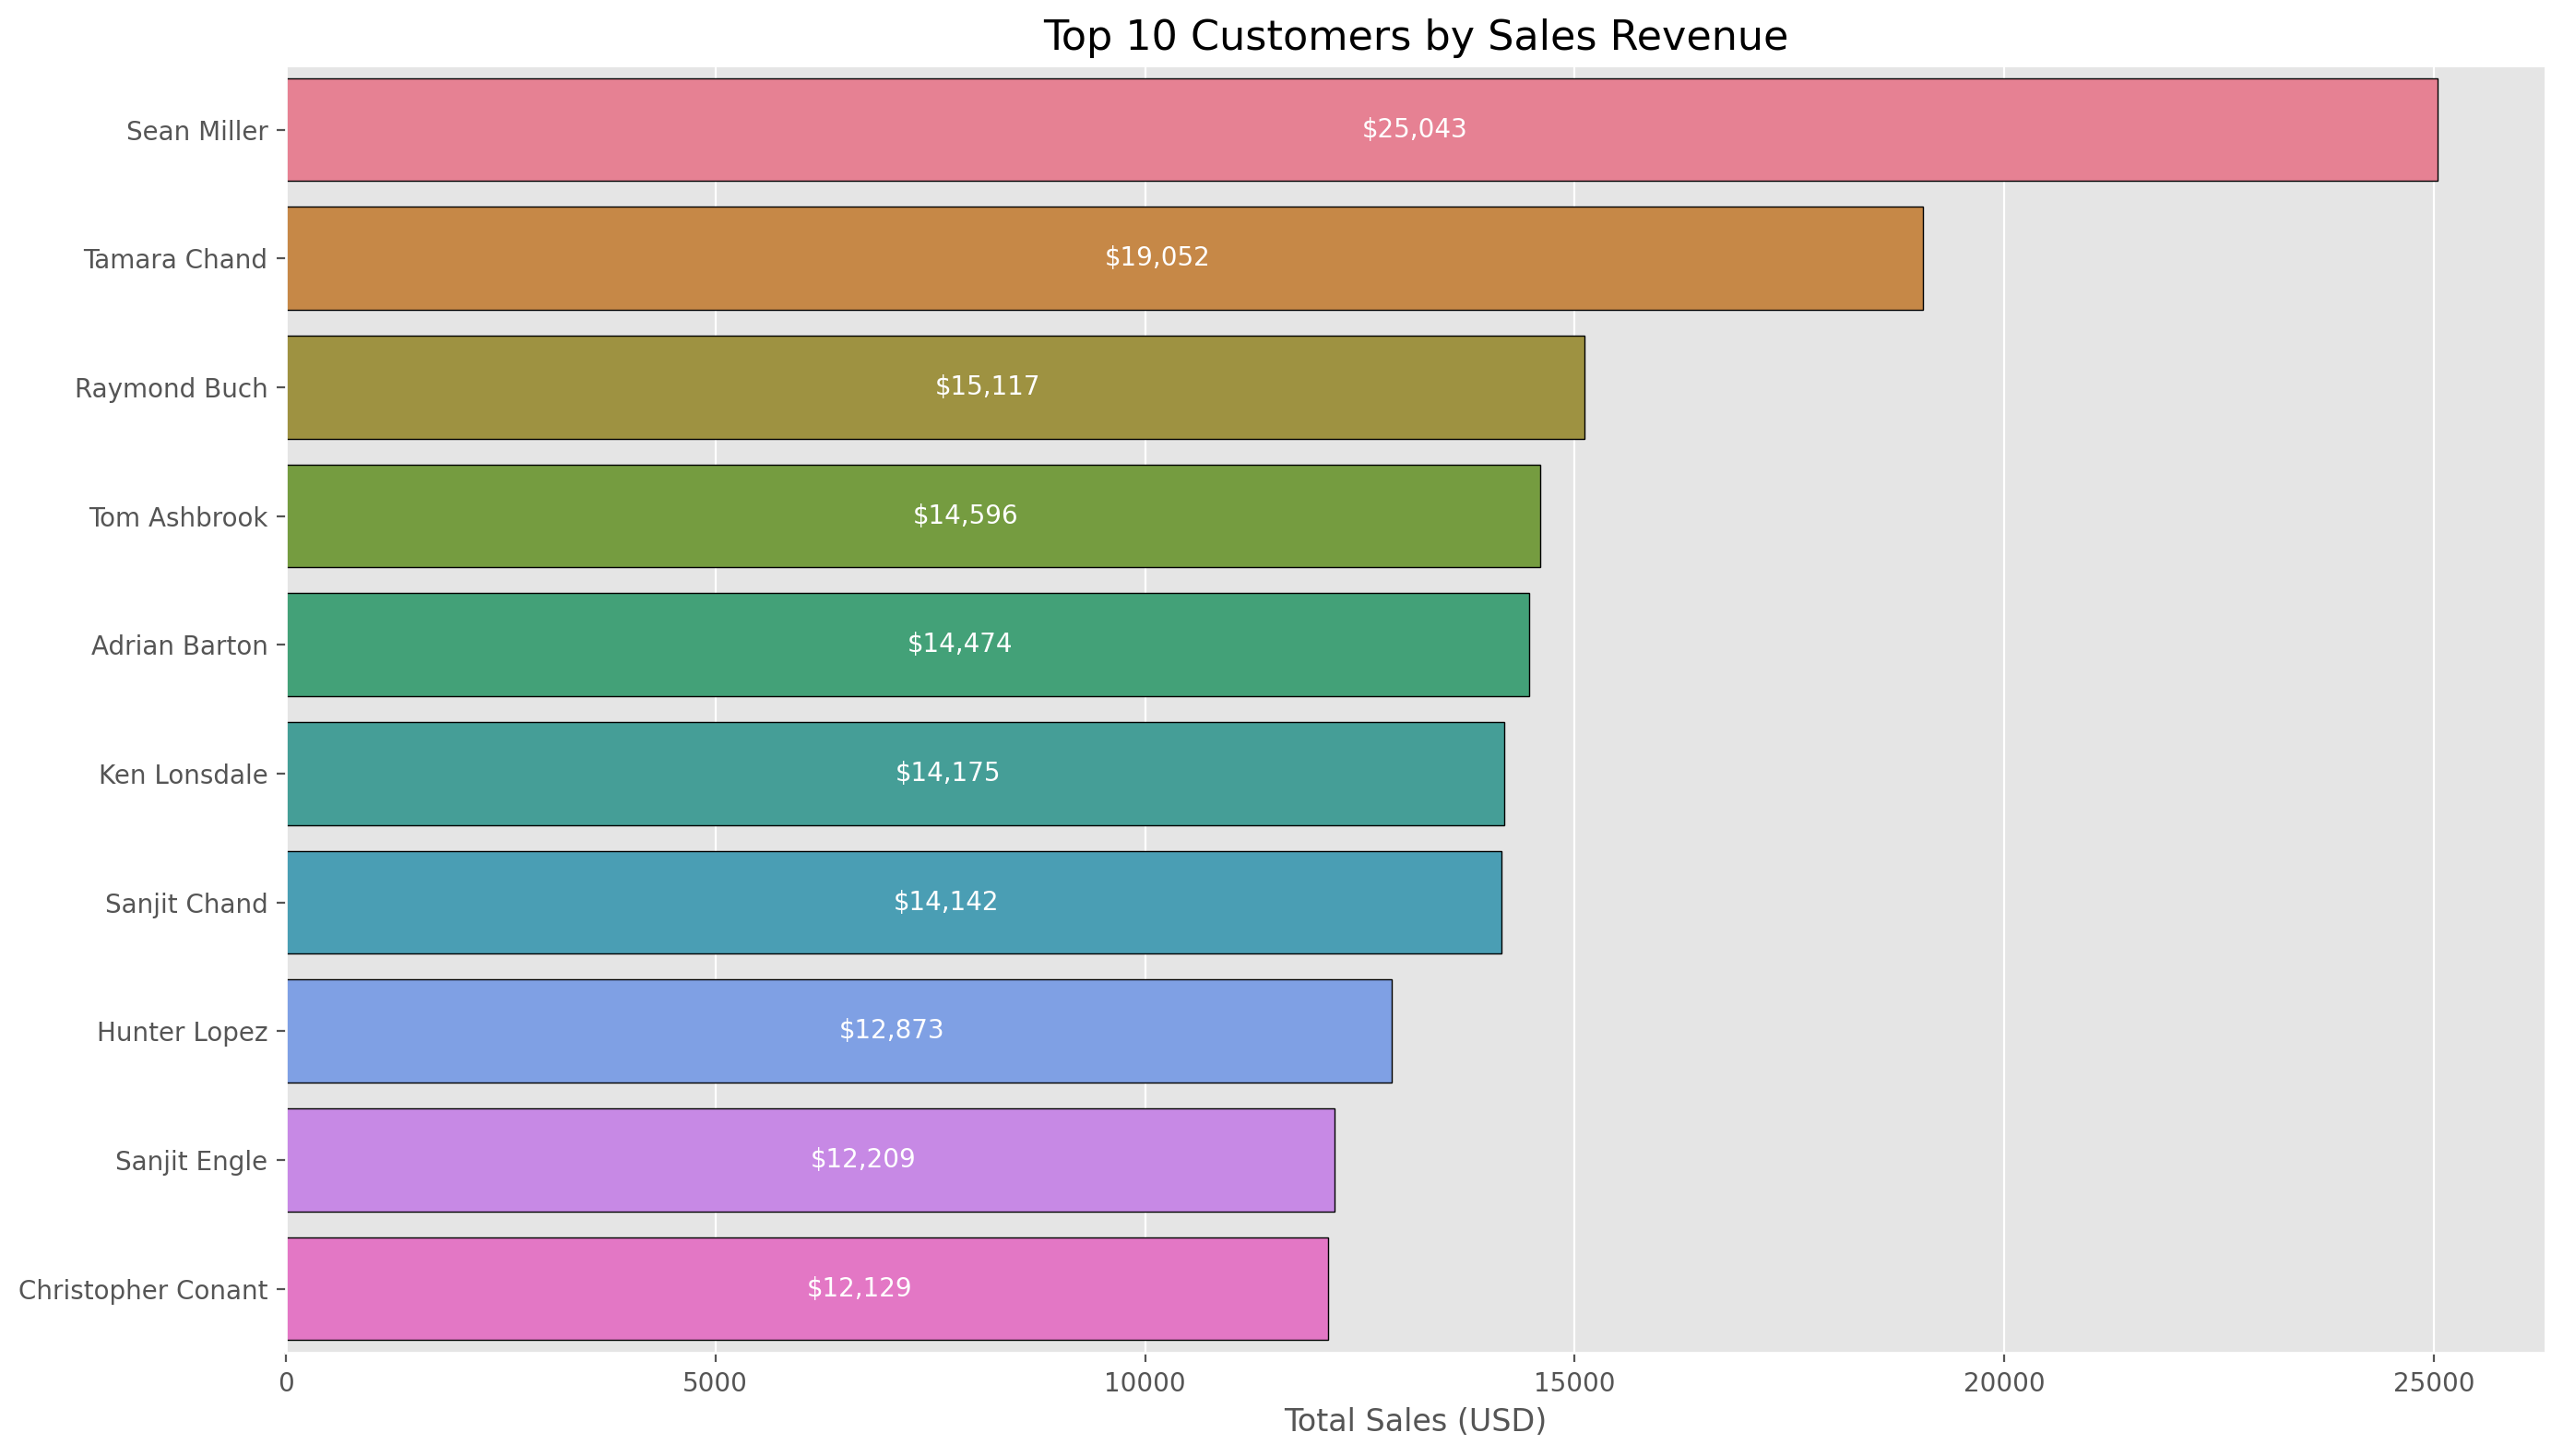

In [48]:
def plot_top_customers(data, n=10):
    """Visualize top customers with horizontal bars"""
    top_customers = (
        data.groupby("Customer Name", as_index=False)
        .agg(Sales=("Sales", "sum"))
        .nlargest(n, "Sales")
    )
    
    plt.figure(figsize=(14, 8))
    
    ax = sns.barplot(x='Sales', y='Customer Name', data=top_customers, hue = 'Customer Name',
                     edgecolor="black")
    
    plt.title(f"Top {n} Customers by Sales Revenue", fontsize=16)
    plt.xlabel("Total Sales (USD)", fontsize=12)
    plt.ylabel("")
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    # Add value labels inside bars
    for p in ax.patches:
        width = p.get_width()
        ax.text(width/2, p.get_y() + p.get_height()/2, 
                f'${width:,.0f}', 
                va='center', ha='left', 
                color='white', fontsize=10)
    
    plt.tight_layout()
    plt.show()

plot_top_customers(df)

#### 1.2 Customer Segmentation Analysis

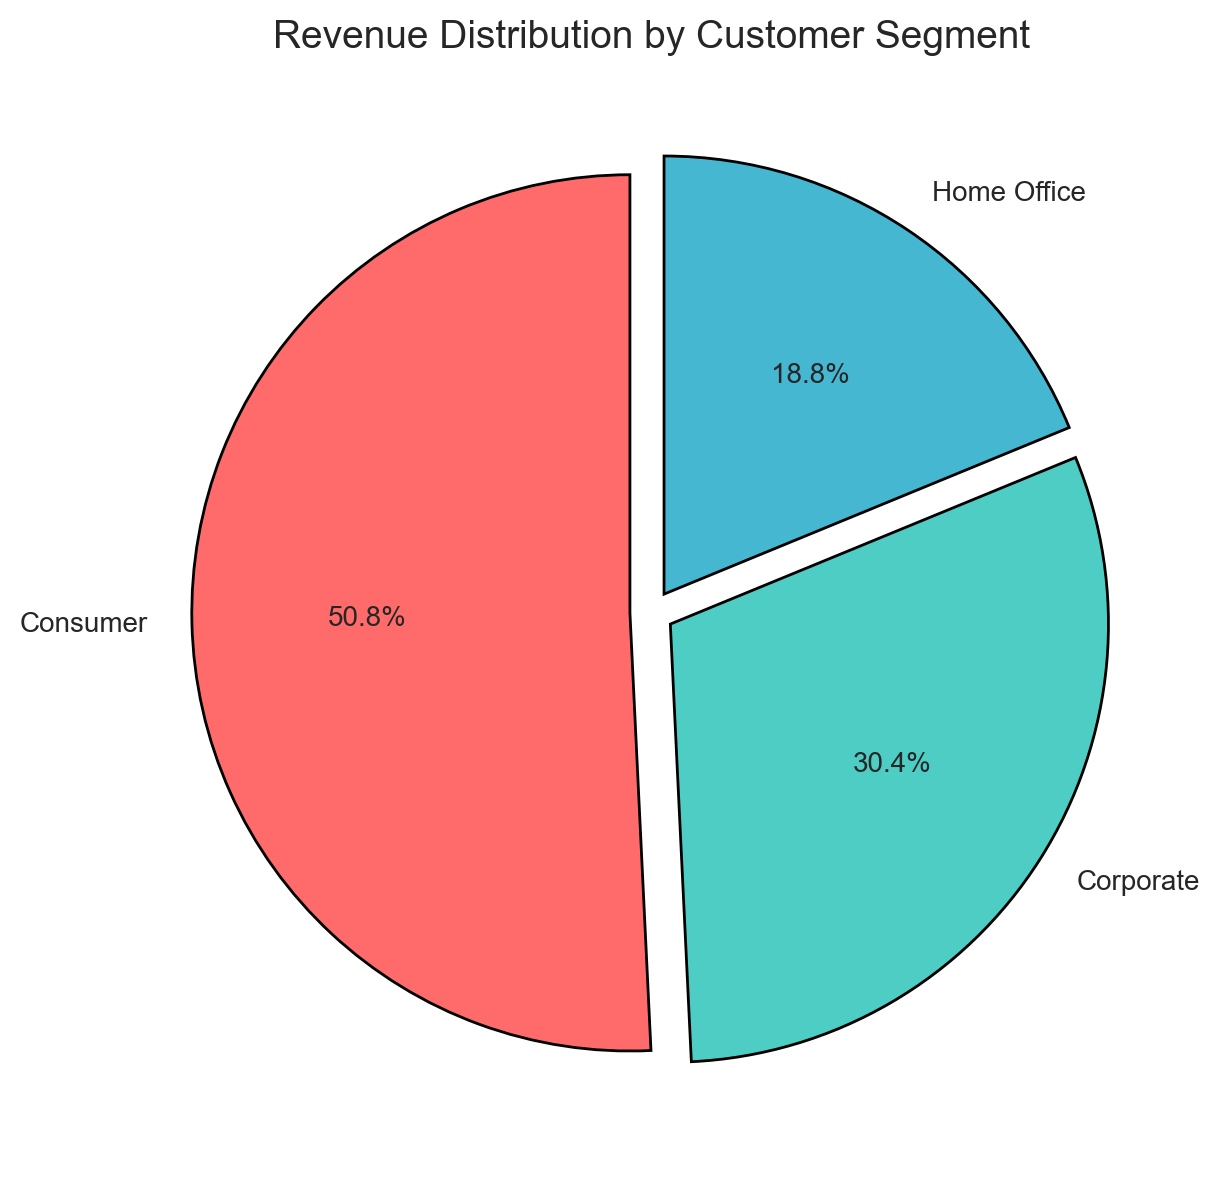

In [33]:
def plot_segment_distribution(data):
    """Show customer segments with pie chart"""
    segment_data = data.groupby('Segment')['Sales'].sum()
    
    plt.figure(figsize=(10, 6))
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    explode = (0.05, 0.05, 0.05)
    
    plt.pie(segment_data, labels=segment_data.index,
            autopct='%1.1f%%', startangle=90,
            colors=colors, explode=explode,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1})
    
    plt.title('Revenue Distribution by Customer Segment', fontsize=14)
    plt.tight_layout()
    plt.show()

plot_segment_distribution(df)

### 2. Geographic Analysis

#### 2.1 Sales by State

C:\ZYX\ipykernel_8384\3911560608.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


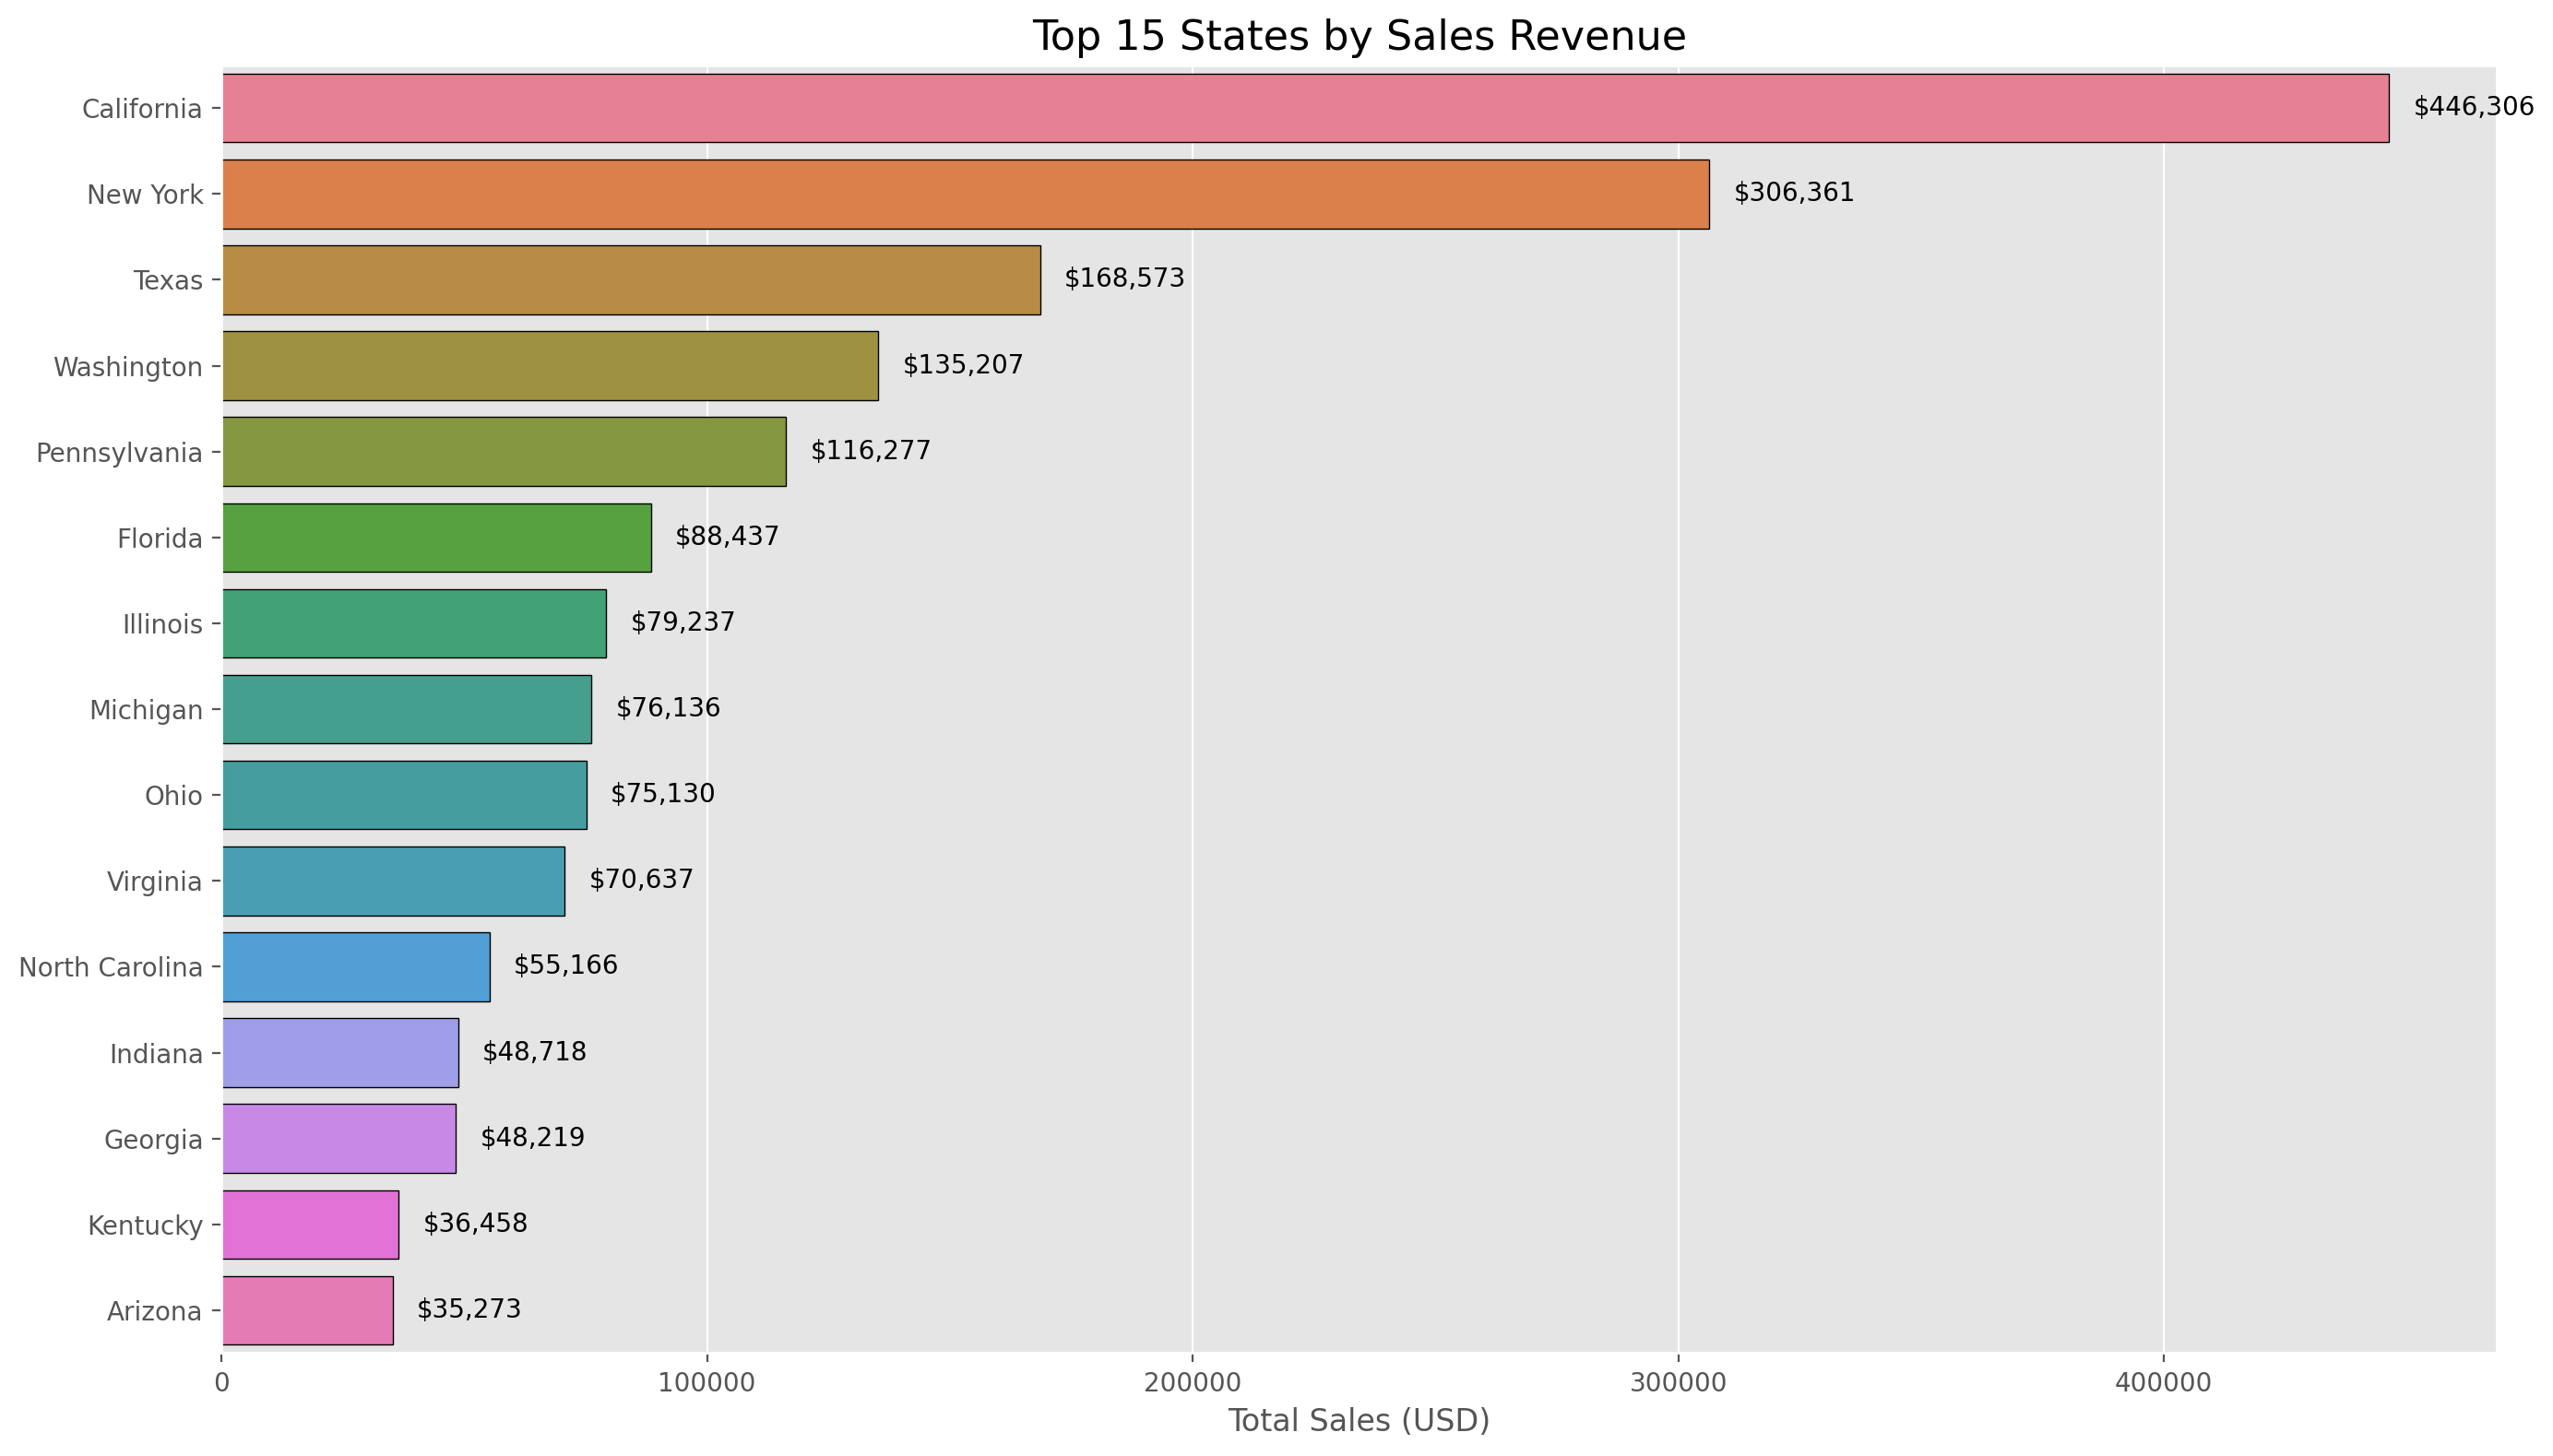

In [ ]:
def plot_state_performance(data):
    """State performance with diverging colors"""
    state_data = (
        data.groupby('State')['Sales']
        .sum().nlargest(15)
        .reset_index()
    )
    
    plt.figure(figsize=(14, 8))
    cmap = plt.cm.get_cmap('coolwarm')
    colors = [cmap(i/len(state_data)) for i in range(len(state_data))]
    

    ax = sns.barplot(x='Sales', y='State', data=state_data,
                   hue='State', edgecolor='black', legend=False)
    
    plt.title('Top 15 States by Sales Revenue', fontsize=16)
    plt.xlabel('Total Sales (USD)', fontsize=12)
    plt.ylabel('')
    
    # Add value annotations
    for p in ax.patches:
        ax.text(p.get_width() + 5000, 
                p.get_y() + p.get_height()/2, 
                f'${p.get_width():,.0f}', 
                va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()

plot_state_performance(df)

#### 2.2 Regional Performance Analysis

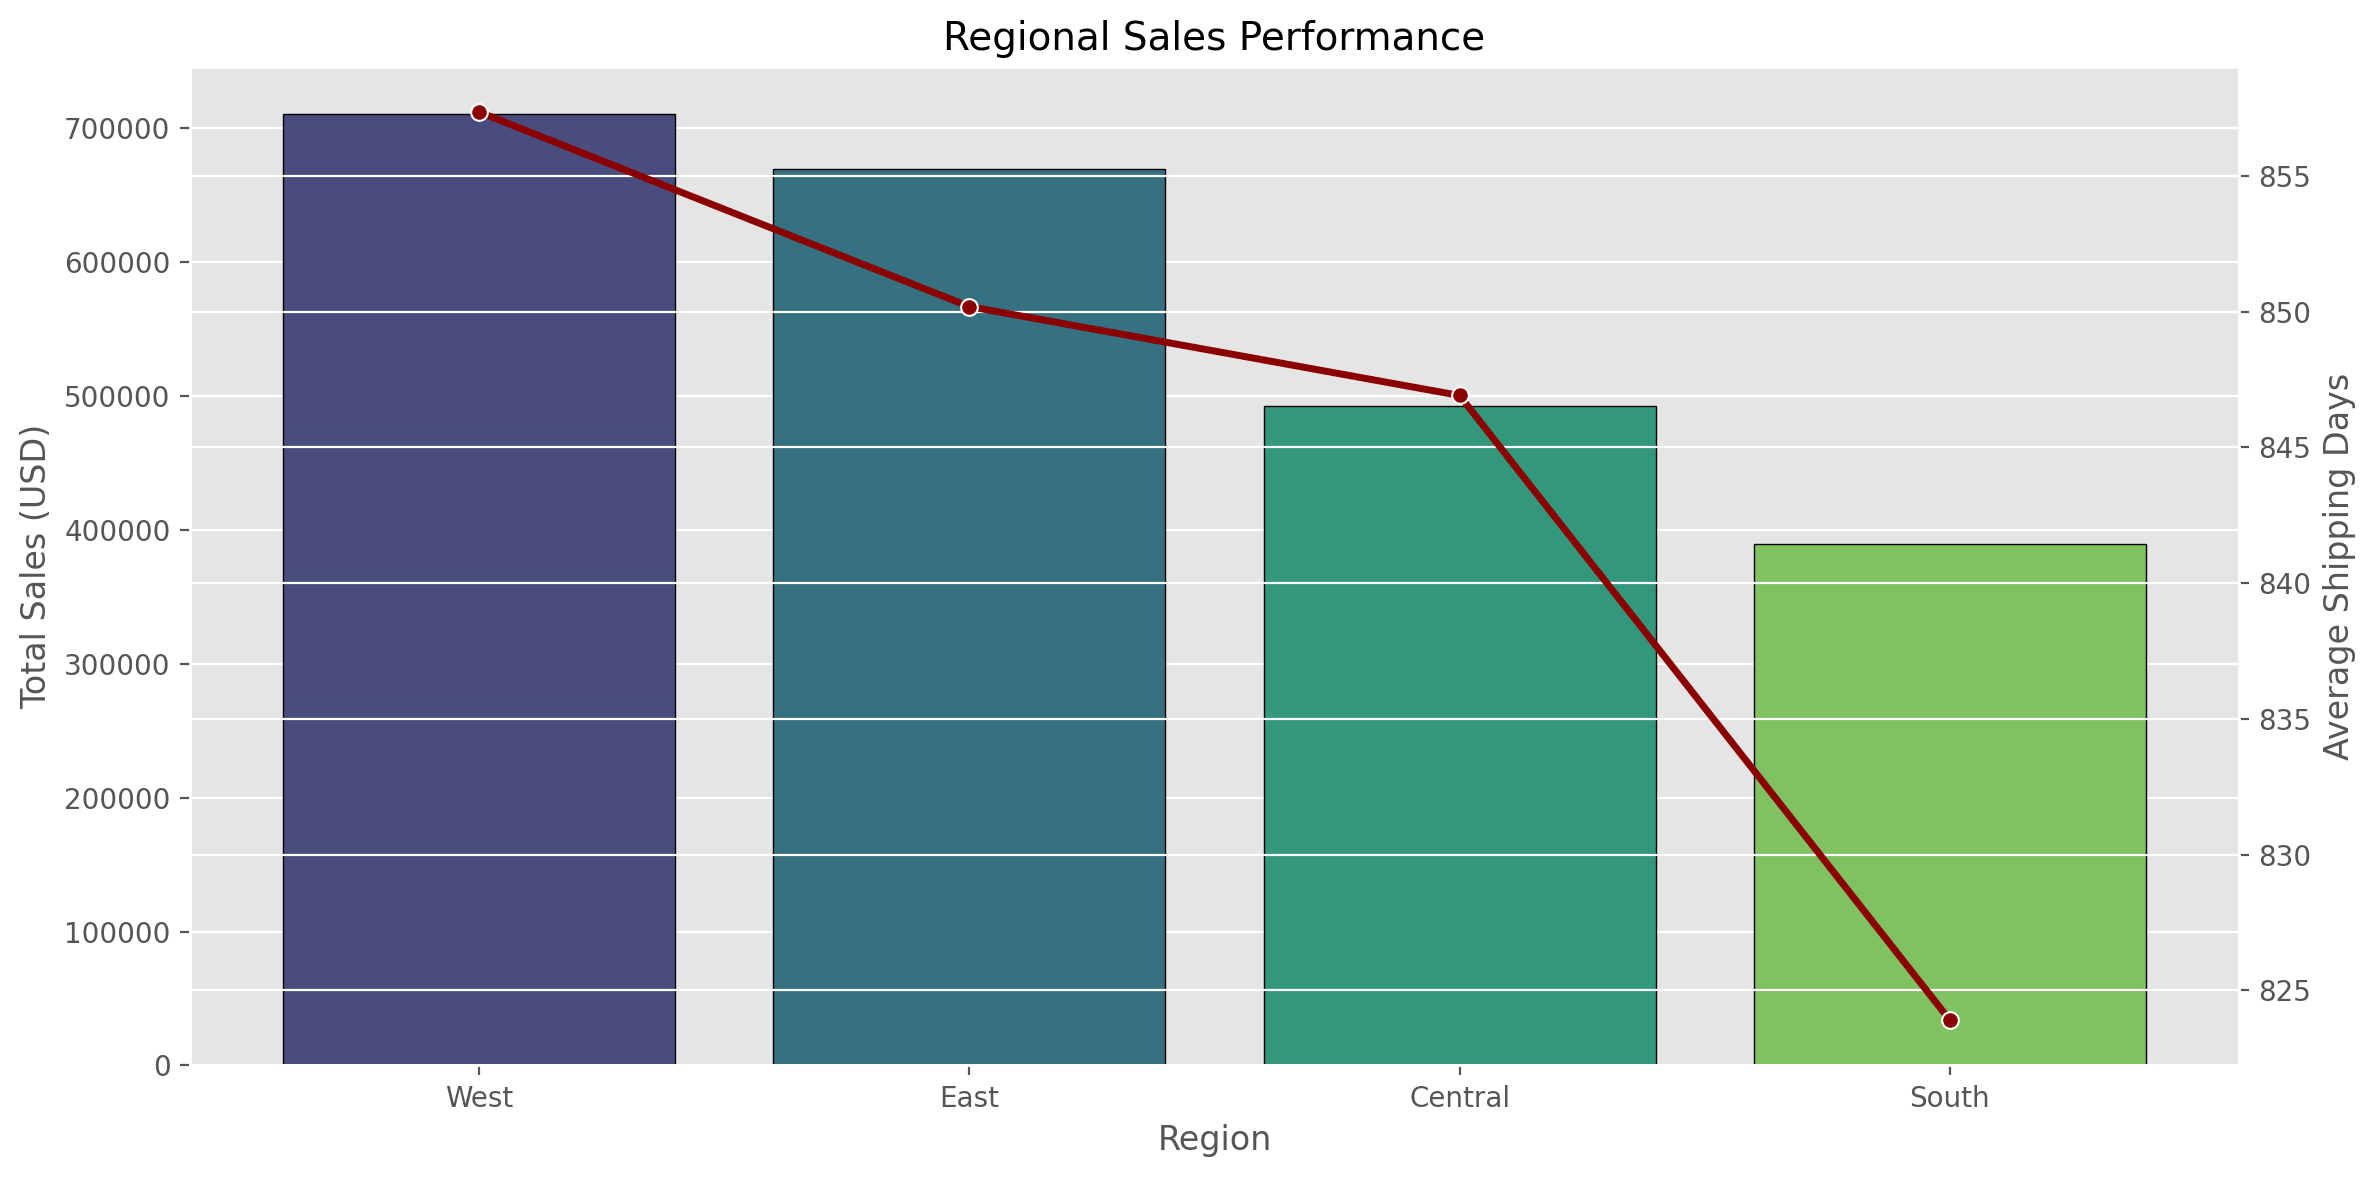

In [ ]:
# Regional sales analysis
region_analysis = (
    df.groupby('Region')
    .agg(Total_Sales=('Sales', 'sum'),
         Average_Shipping_Days=('Ship Date', lambda x: (x - x.min()).dt.days.mean()))  # Corrected
    .sort_values('Total_Sales', ascending=False)
)

# Create dual-axis visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for sales
sns.barplot(x=region_analysis.index, y='Total_Sales', data=region_analysis, ax=ax1,
                   hue=region_analysis.index, palette='viridis', edgecolor='black', legend=False)
ax1.set_title('Regional Sales Performance', fontsize=14)
ax1.set_ylabel('Total Sales (USD)', fontsize=12)

# Line plot for shipping efficiency
ax2 = ax1.twinx()
sns.lineplot(x=region_analysis.index, 
             y=region_analysis['Average_Shipping_Days'], 
             ax=ax2, 
             color='darkred', 
             marker='o',
             linewidth=2.5)
ax2.set_ylabel('Average Shipping Days', fontsize=12)

plt.tight_layout()
plt.show()


### 3. Product Analysis

#### 3.1 Category Performance

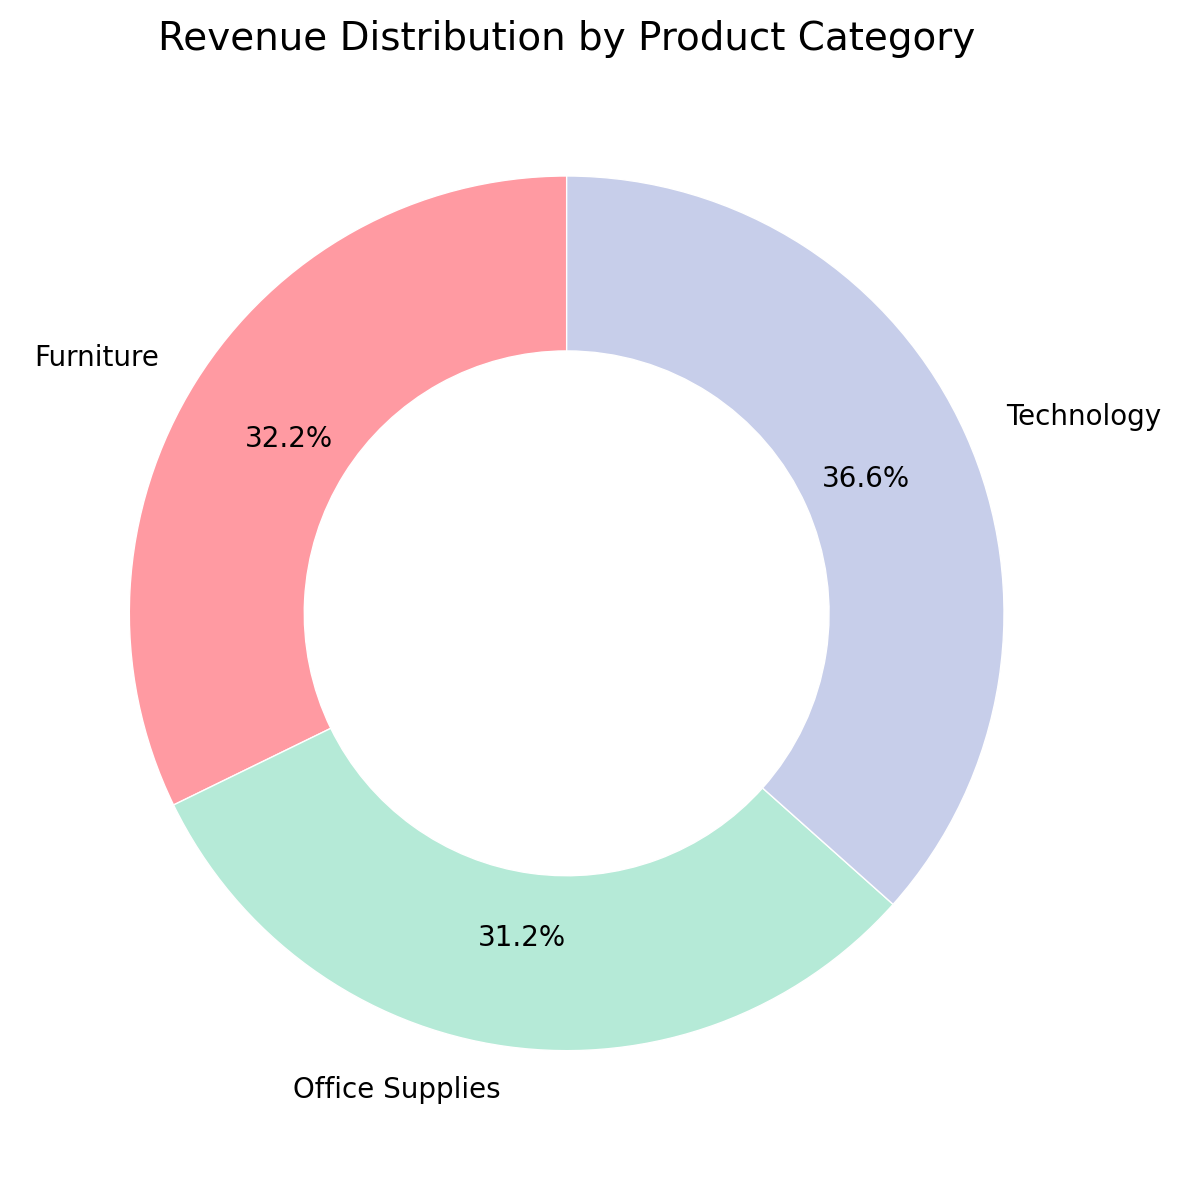

In [11]:

def plot_category_distribution(data):
    category_data = data.groupby('Category')['Sales'].sum()
    
    plt.figure(figsize=(10, 6))
    colors = ['#FF9AA2', '#B5EAD7', '#C7CEEA']
    
    wedges, texts, autotexts = plt.pie(category_data, labels=category_data.index,
                                       autopct='%1.1f%%', startangle=90,
                                       colors=colors, wedgeprops={'width': 0.4, 'edgecolor': 'w'},
                                       pctdistance=0.75)  # Adjusted this to bring text inside
    
    # Add circle in the center to create the donut effect
    plt.gca().add_artist(plt.Circle((0,0), 0.3, fc='white'))
    
    plt.title('Revenue Distribution by Product Category', fontsize=14)
    plt.tight_layout()
    plt.show()

plot_category_distribution(df)


#### 3.2 Top Performing Products

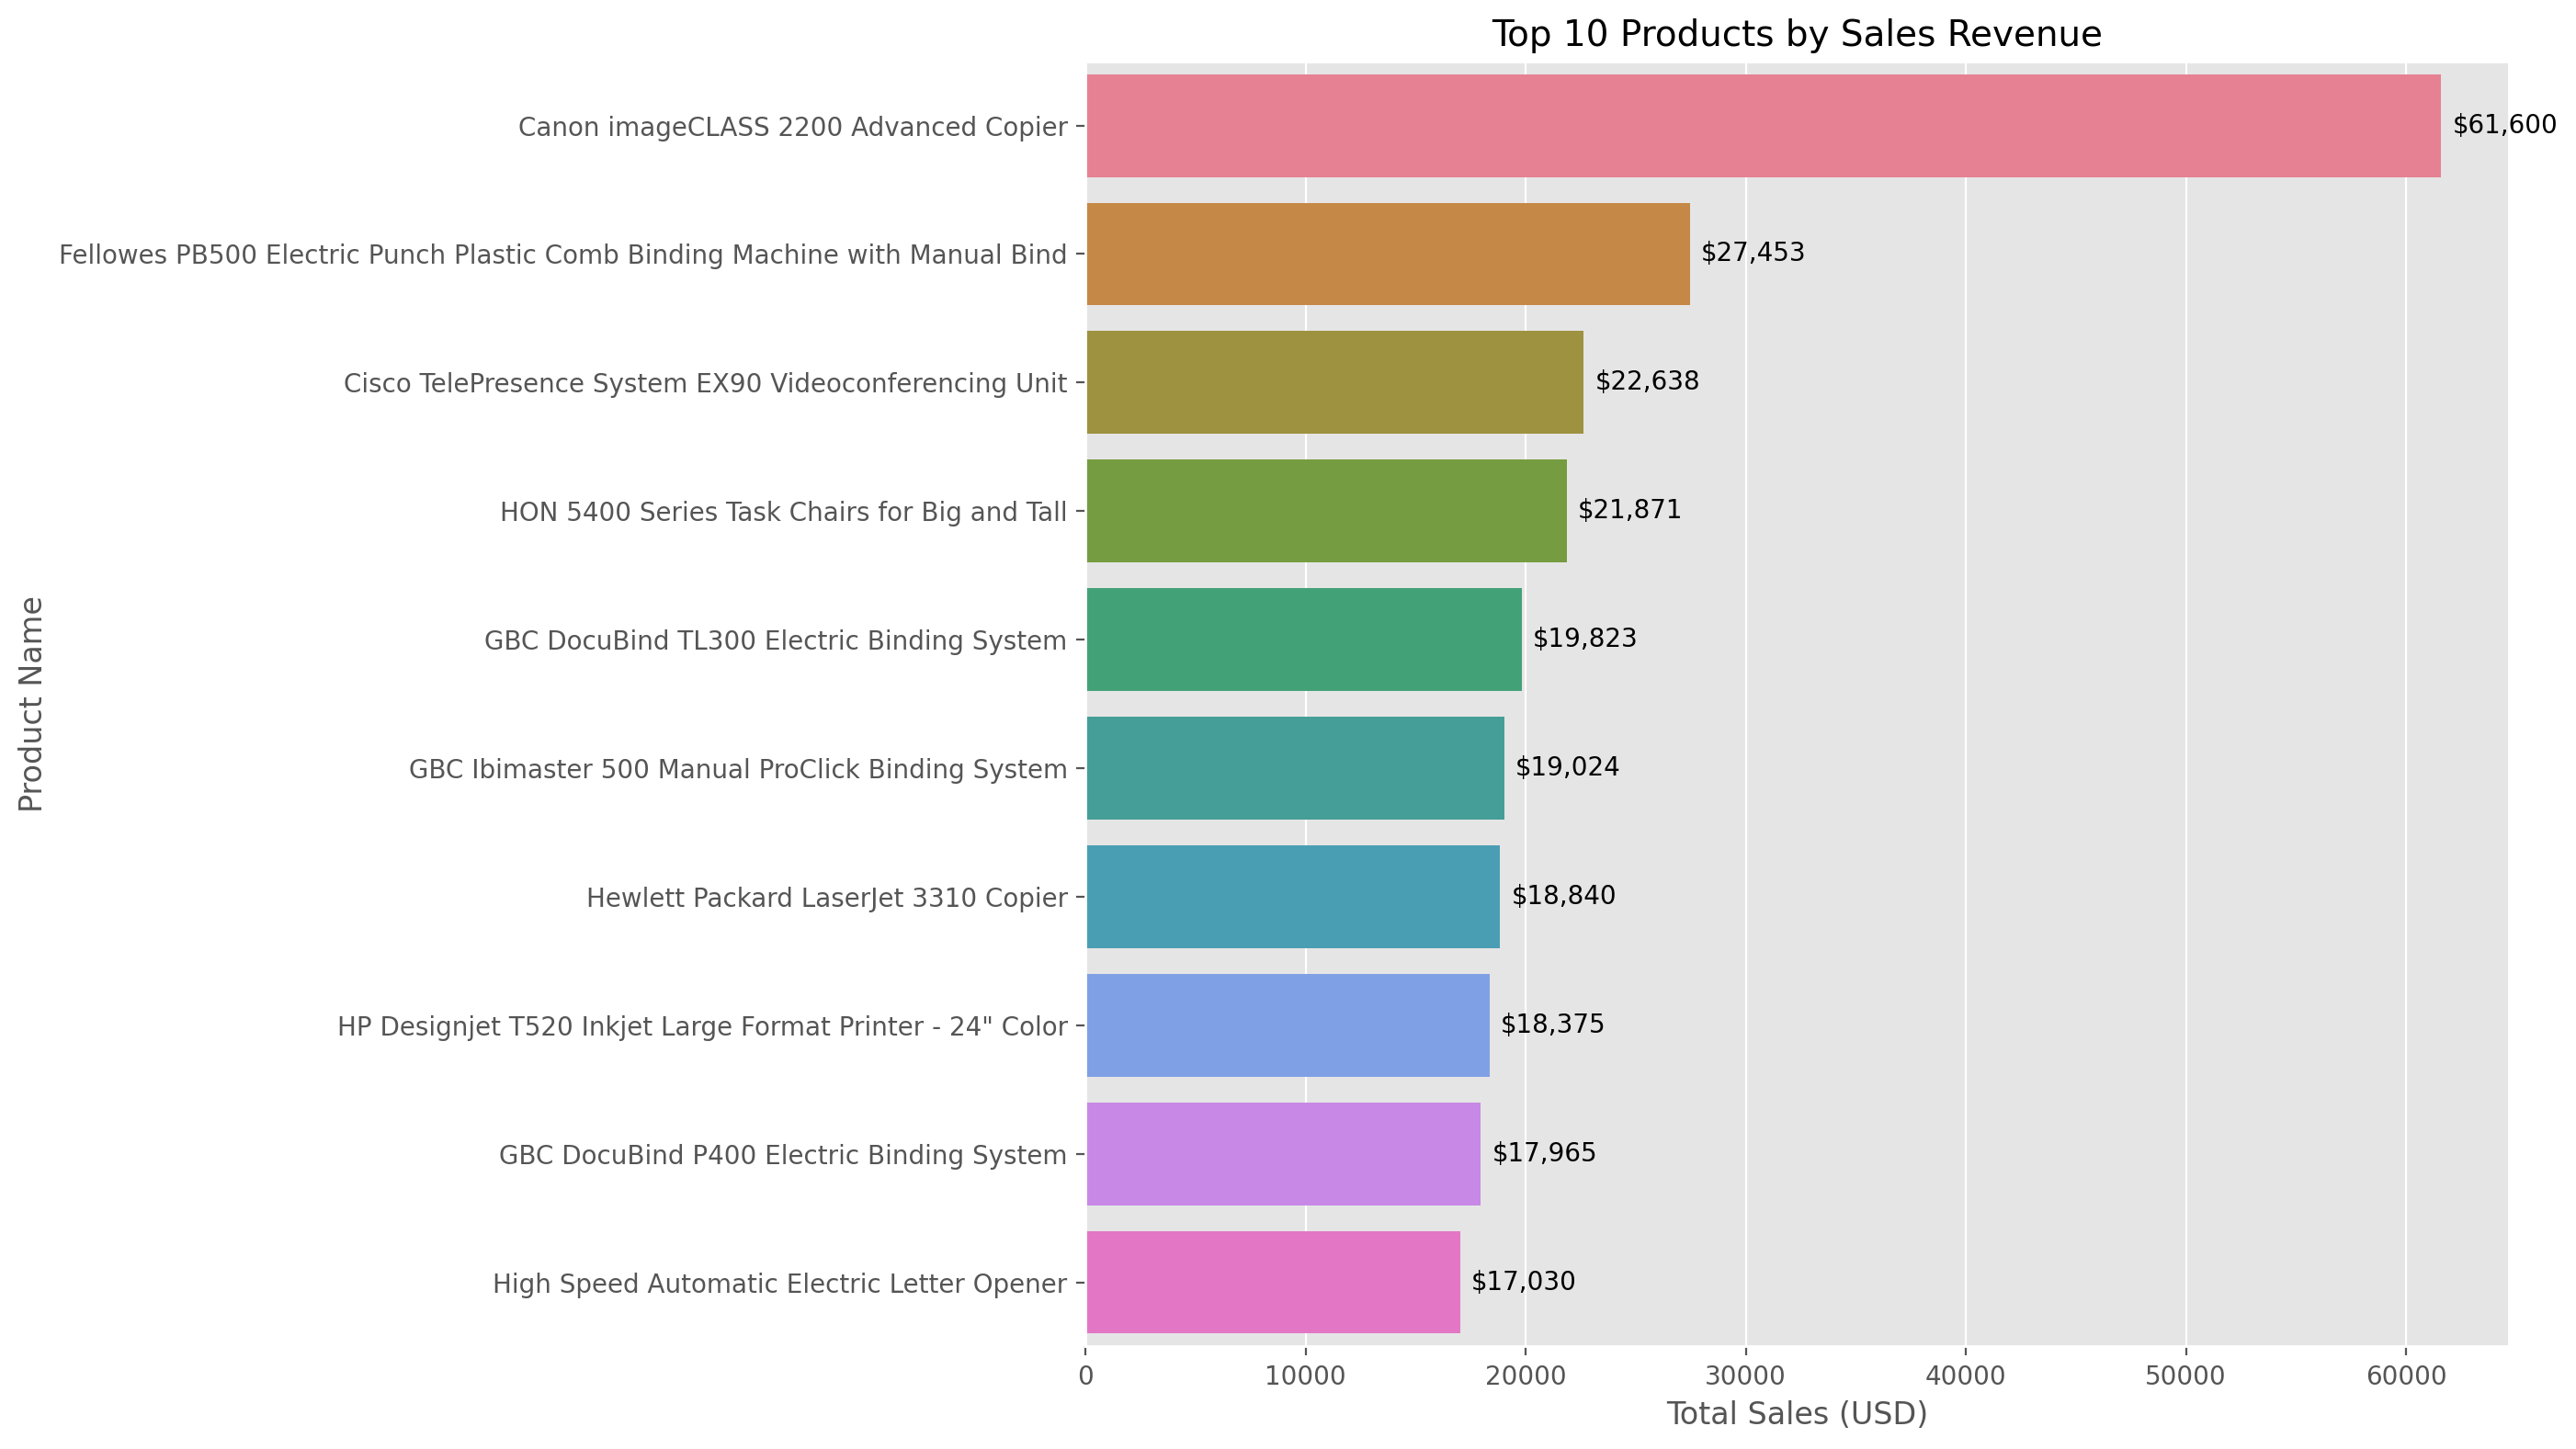

In [45]:
def plot_top_products(data, n=10):
    """Analyze and visualize top N performing products"""
    # Prepare data
    product_performance = (
        data.groupby('Product Name')
        .agg(Total_Sales=('Sales', 'sum'),
             Order_Count=('Sales', 'count'))
        .sort_values('Total_Sales', ascending=False)
        .head(n)
        .reset_index()
    )
    
    # Create visualization
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(x='Total_Sales', y='Product Name', data=product_performance, hue = 'Product Name')
    
    # Customize plot
    plt.title(f'Top {n} Products by Sales Revenue', fontsize=14)
    plt.xlabel('Total Sales (USD)', fontsize=12)
    plt.ylabel('Product Name', fontsize=12)
    
    # Add value annotations
    for p in ax.patches:
        ax.text(p.get_width() + 500, 
                p.get_y() + p.get_height()/2, 
                f"${p.get_width():,.0f}", 
                va='center', 
                fontsize=10)
    
    plt.tight_layout()
    plt.show()

plot_top_products(df)

## B. Time Series Analysis

In [11]:
# Create a copy of dataframe for time series analysis
ts_df = df.copy()

In [12]:
# Create time-based features
ts_df['Year'] = ts_df.index.year
ts_df['Month'] = ts_df.index.month_name()
ts_df['Quarter'] = ts_df.index.quarter
ts_df['Day_of_Week'] = ts_df.index.day_name()
ts_df['Day_of_Month'] = ts_df.index.day
ts_df['Week_of_Year'] = ts_df.index.isocalendar().week

#### 1. Multi-Frequency Sales Trends

In [15]:
# Resample sales data at different frequencies
daily_sales = ts_df['Sales'].resample('D').sum()
weekly_sales = ts_df['Sales'].resample('W').sum()
monthly_sales = ts_df['Sales'].resample('ME').sum()
quarterly_sales = ts_df['Sales'].resample('QE').sum()
yearly_sales = ts_df['Sales'].resample('YE').sum()

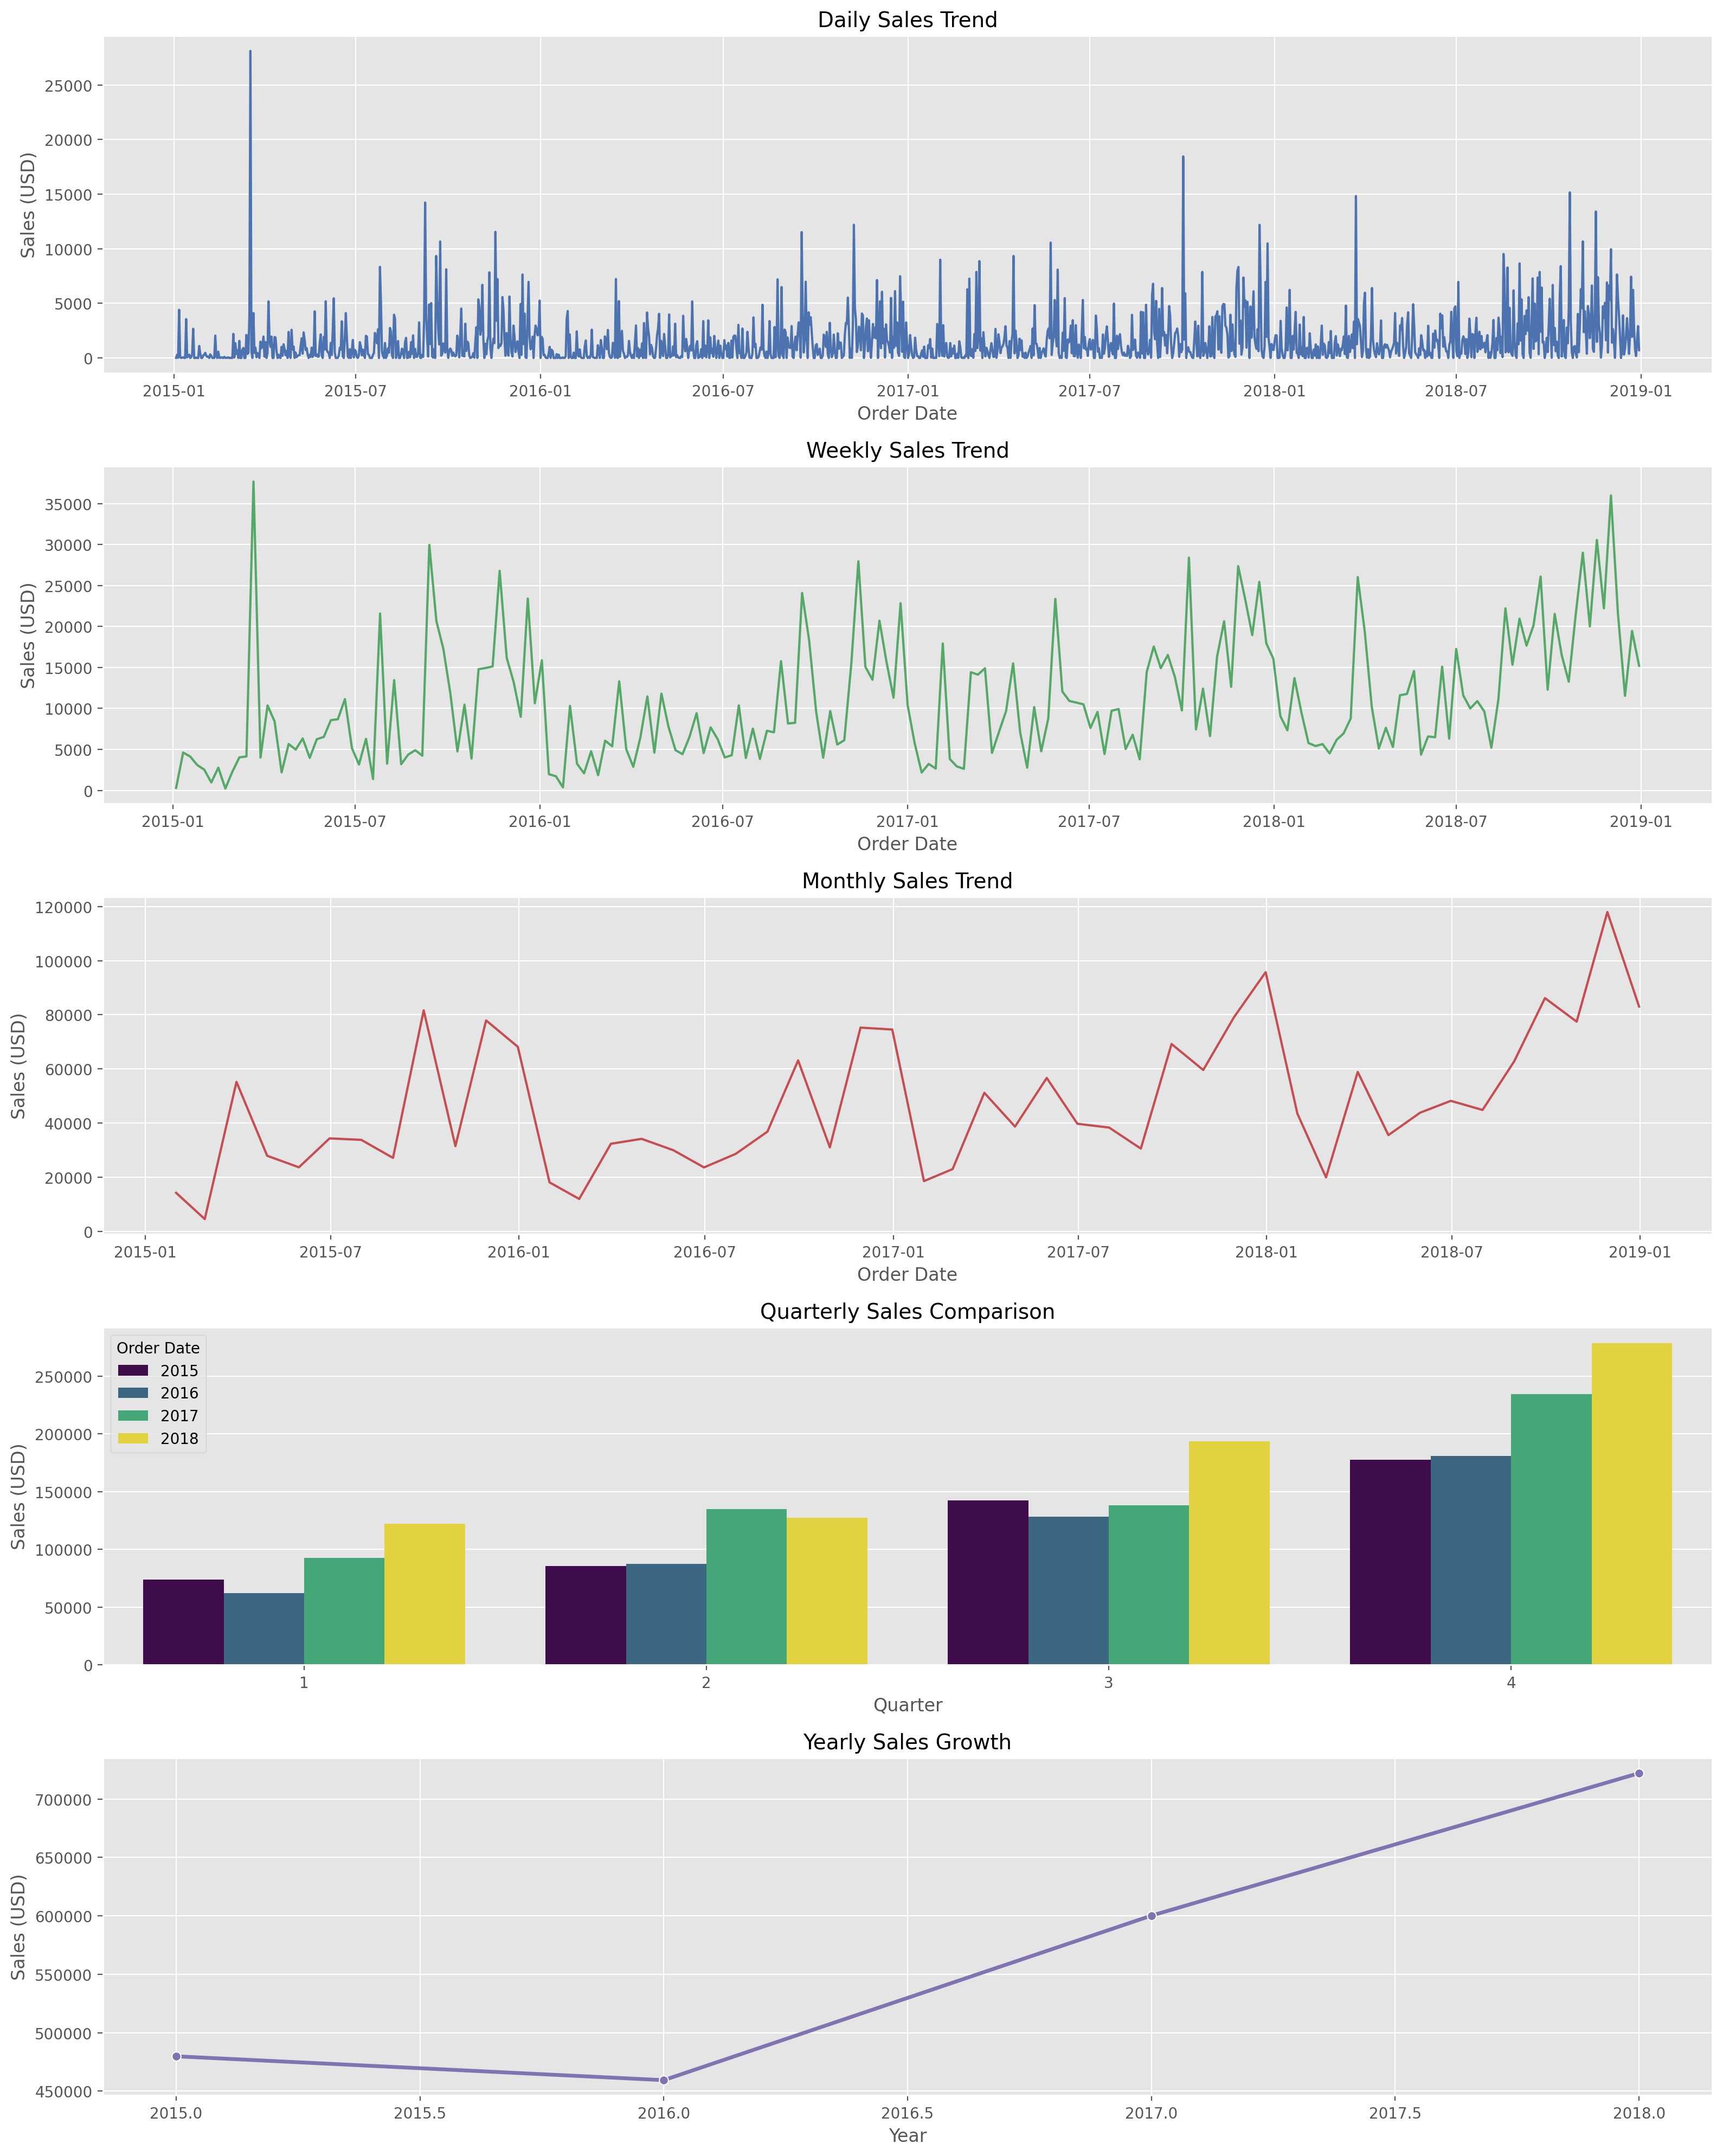

In [18]:
# Create multi-panel plot
fig, axes = plt.subplots(5, 1, figsize=(16, 20))

# Daily Trend
sns.lineplot(x=daily_sales.index, y=daily_sales.values, 
             ax=axes[0], color='#4C72B0')
axes[0].set_title('Daily Sales Trend', fontsize=14)
axes[0].set_ylabel('Sales (USD)')

# Weekly Trend
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values, 
             ax=axes[1], color='#55A868')
axes[1].set_title('Weekly Sales Trend', fontsize=14)
axes[1].set_ylabel('Sales (USD)')

# Monthly Trend
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, 
             ax=axes[2], color='#C44E52')
axes[2].set_title('Monthly Sales Trend', fontsize=14)
axes[2].set_ylabel('Sales (USD)')

# Quarterly Trend
sns.barplot(x=quarterly_sales.index.quarter, y=quarterly_sales.values,
            hue=quarterly_sales.index.year, ax=axes[3], palette='viridis')
axes[3].set_title('Quarterly Sales Comparison', fontsize=14)
axes[3].set_xlabel('Quarter')
axes[3].set_ylabel('Sales (USD)')

# Yearly Trend
sns.lineplot(x=yearly_sales.index.year, y=yearly_sales.values,
             ax=axes[4], marker='o', color='#8172B2', linewidth=2.5)
axes[4].set_title('Yearly Sales Growth', fontsize=14)
axes[4].set_xlabel('Year')
axes[4].set_ylabel('Sales (USD)')

plt.tight_layout()
plt.show()

#### 2. Seasonality and Trend Decomposition

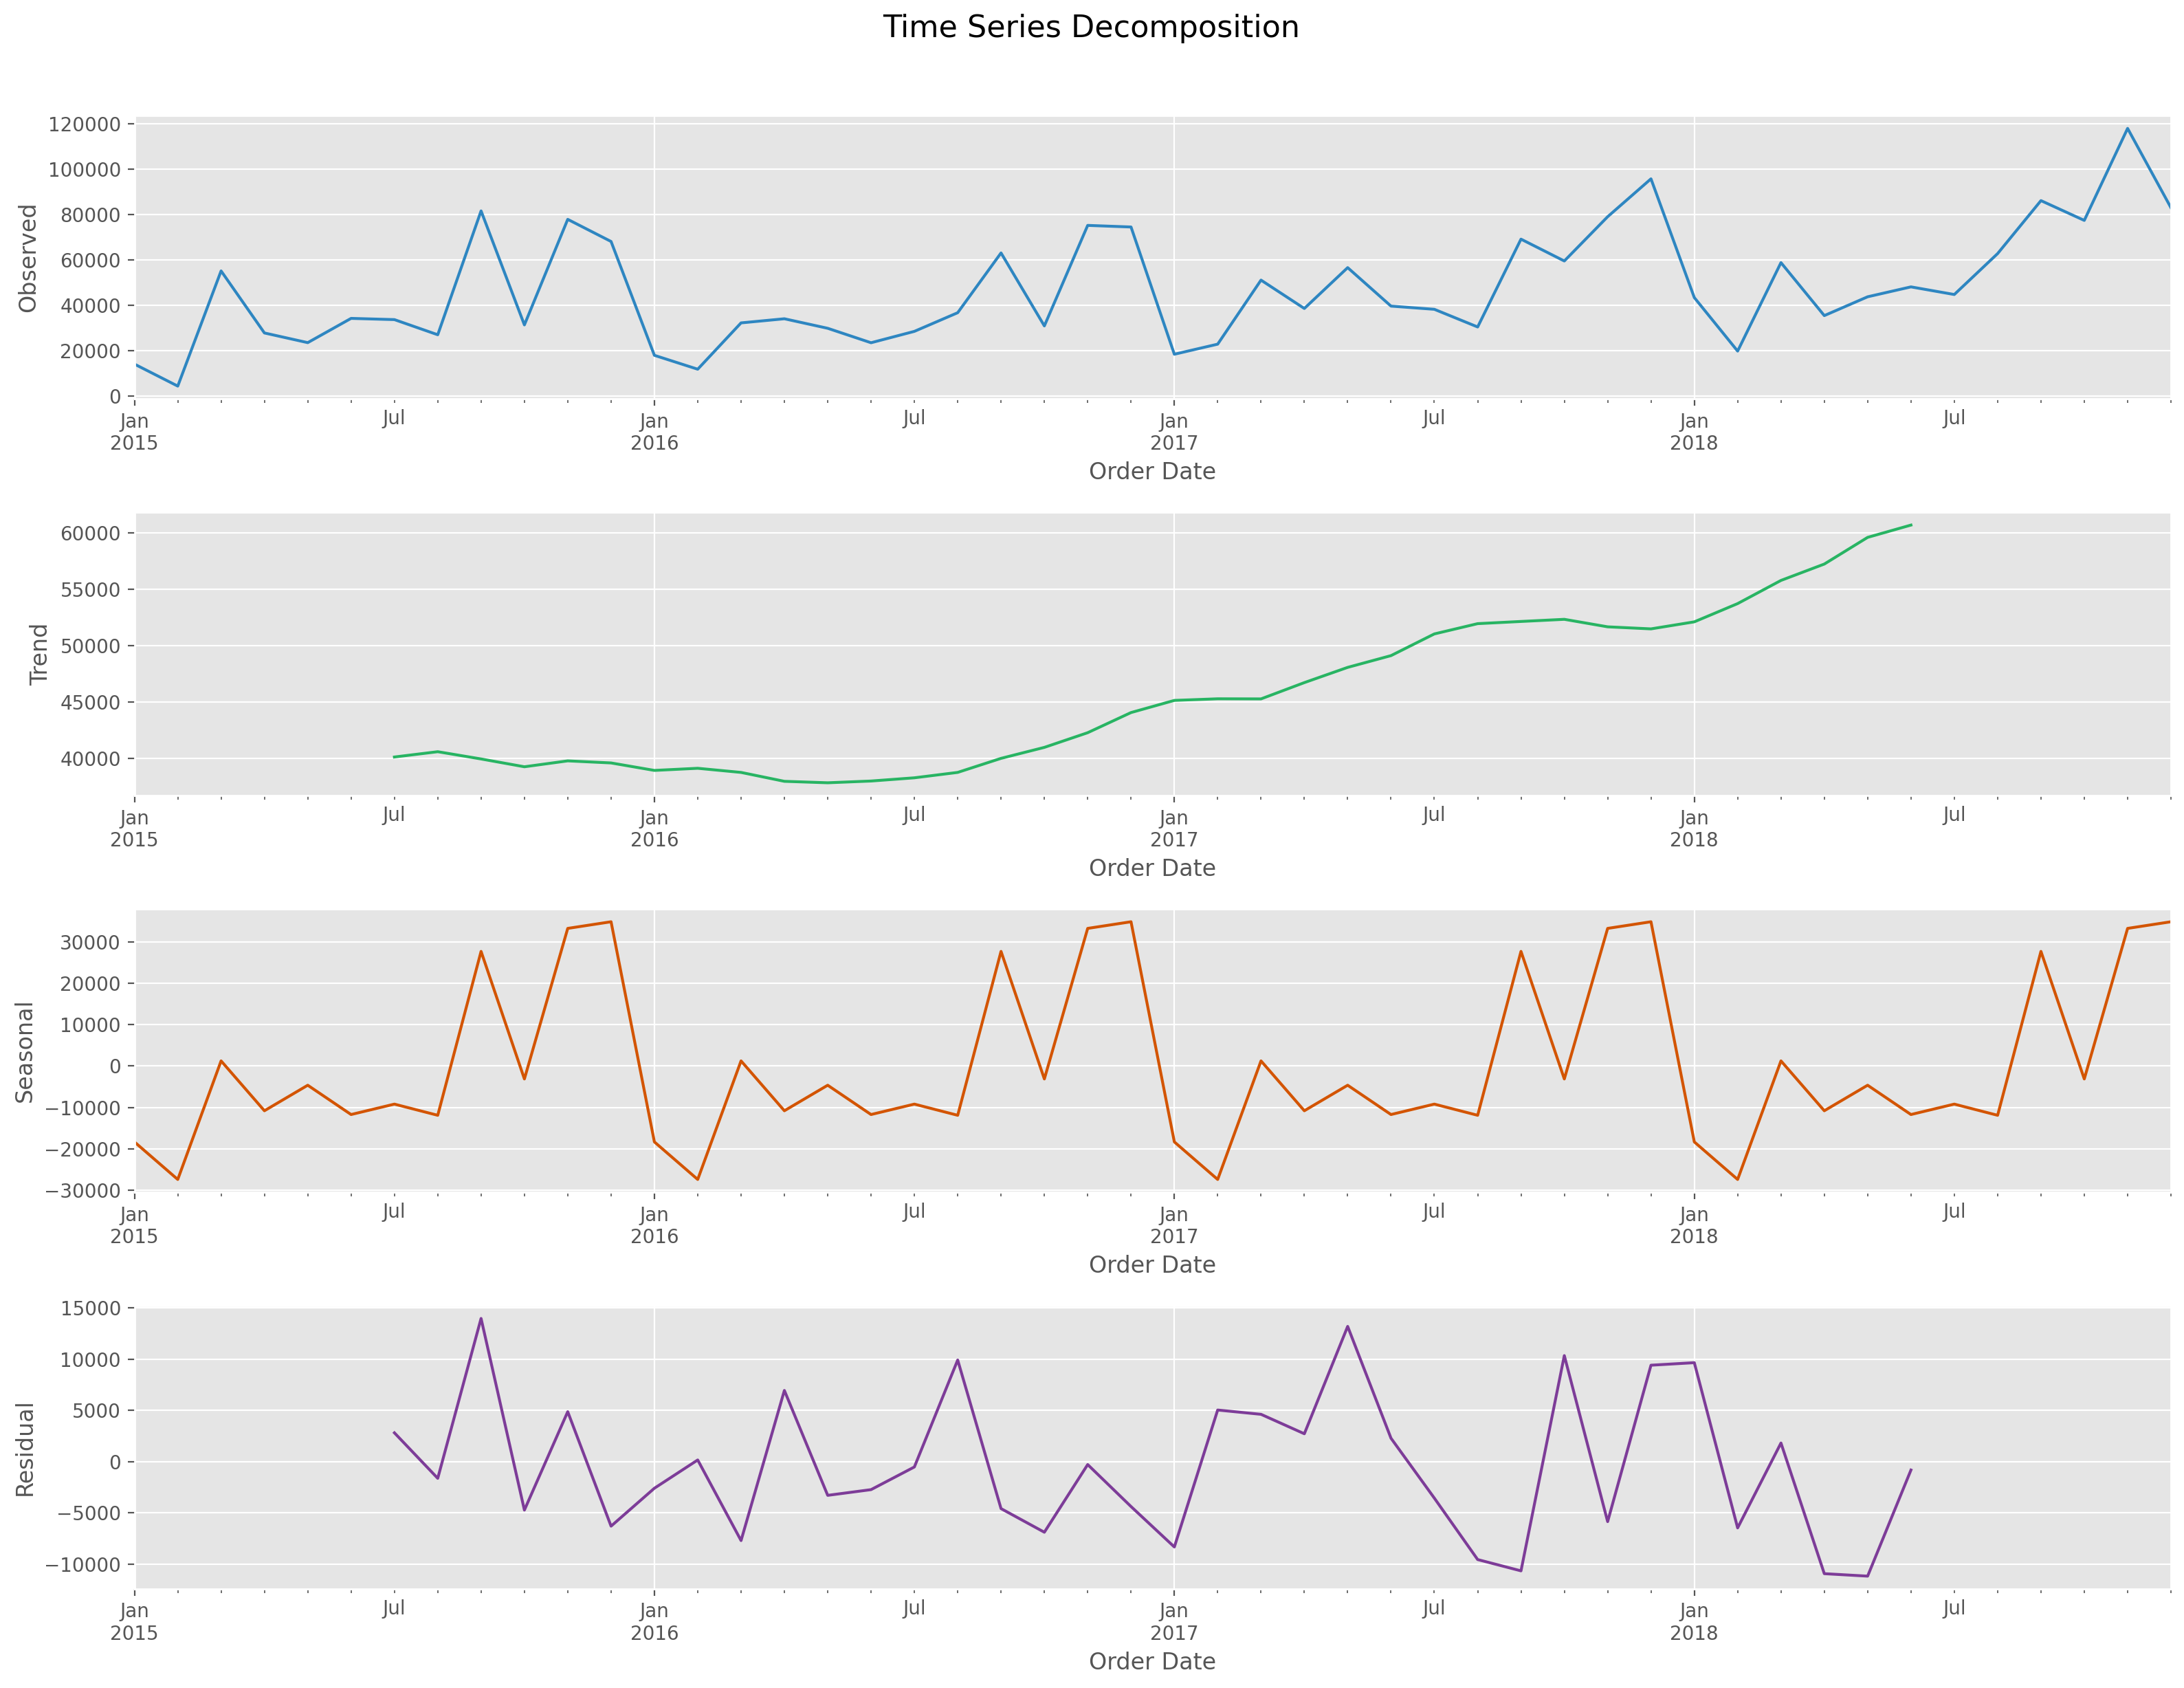

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose monthly sales data
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)

# Plot decomposition components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 12))
decomposition.observed.plot(ax=ax1, color='#2E86C1')
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2, color='#28B463')
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3, color='#D35400')
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4, color='#7D3C98')
ax4.set_ylabel('Residual')

plt.suptitle('Time Series Decomposition', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

#### 3. Moving Average Analysis

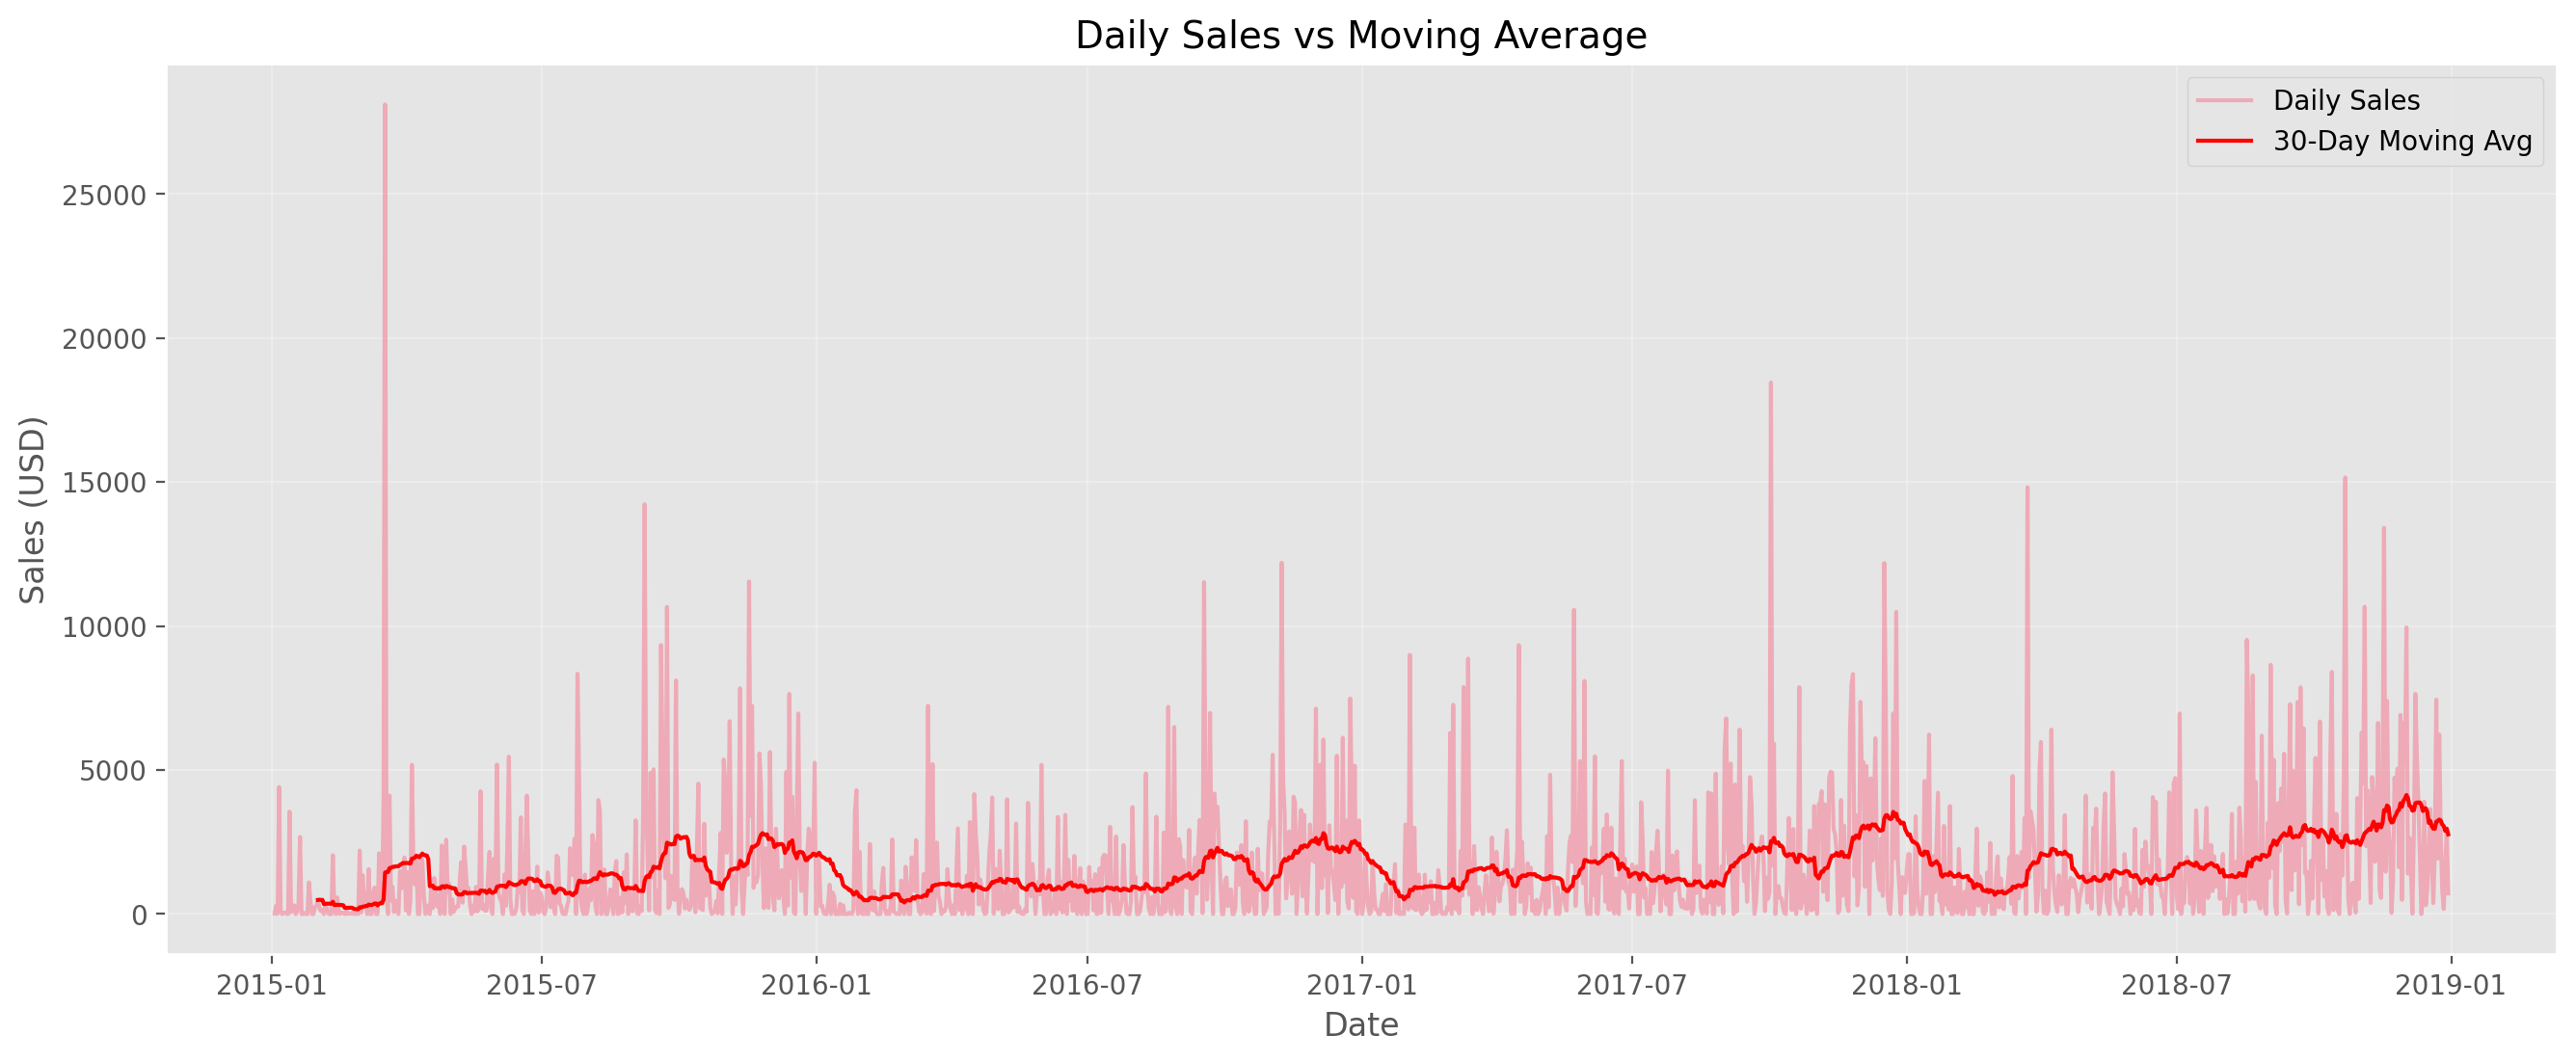

In [20]:
# Calculate moving averages
window_size = 30  # 30-day moving average
moving_avg = daily_sales.rolling(window=window_size).mean()

plt.figure(figsize=(16, 6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, 
             label='Daily Sales', alpha=0.5)
sns.lineplot(x=moving_avg.index, y=moving_avg.values, 
             label=f'{window_size}-Day Moving Avg', color='red')

plt.title('Daily Sales vs Moving Average', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Sales (USD)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

#### 4. Day-of-Week Analysis

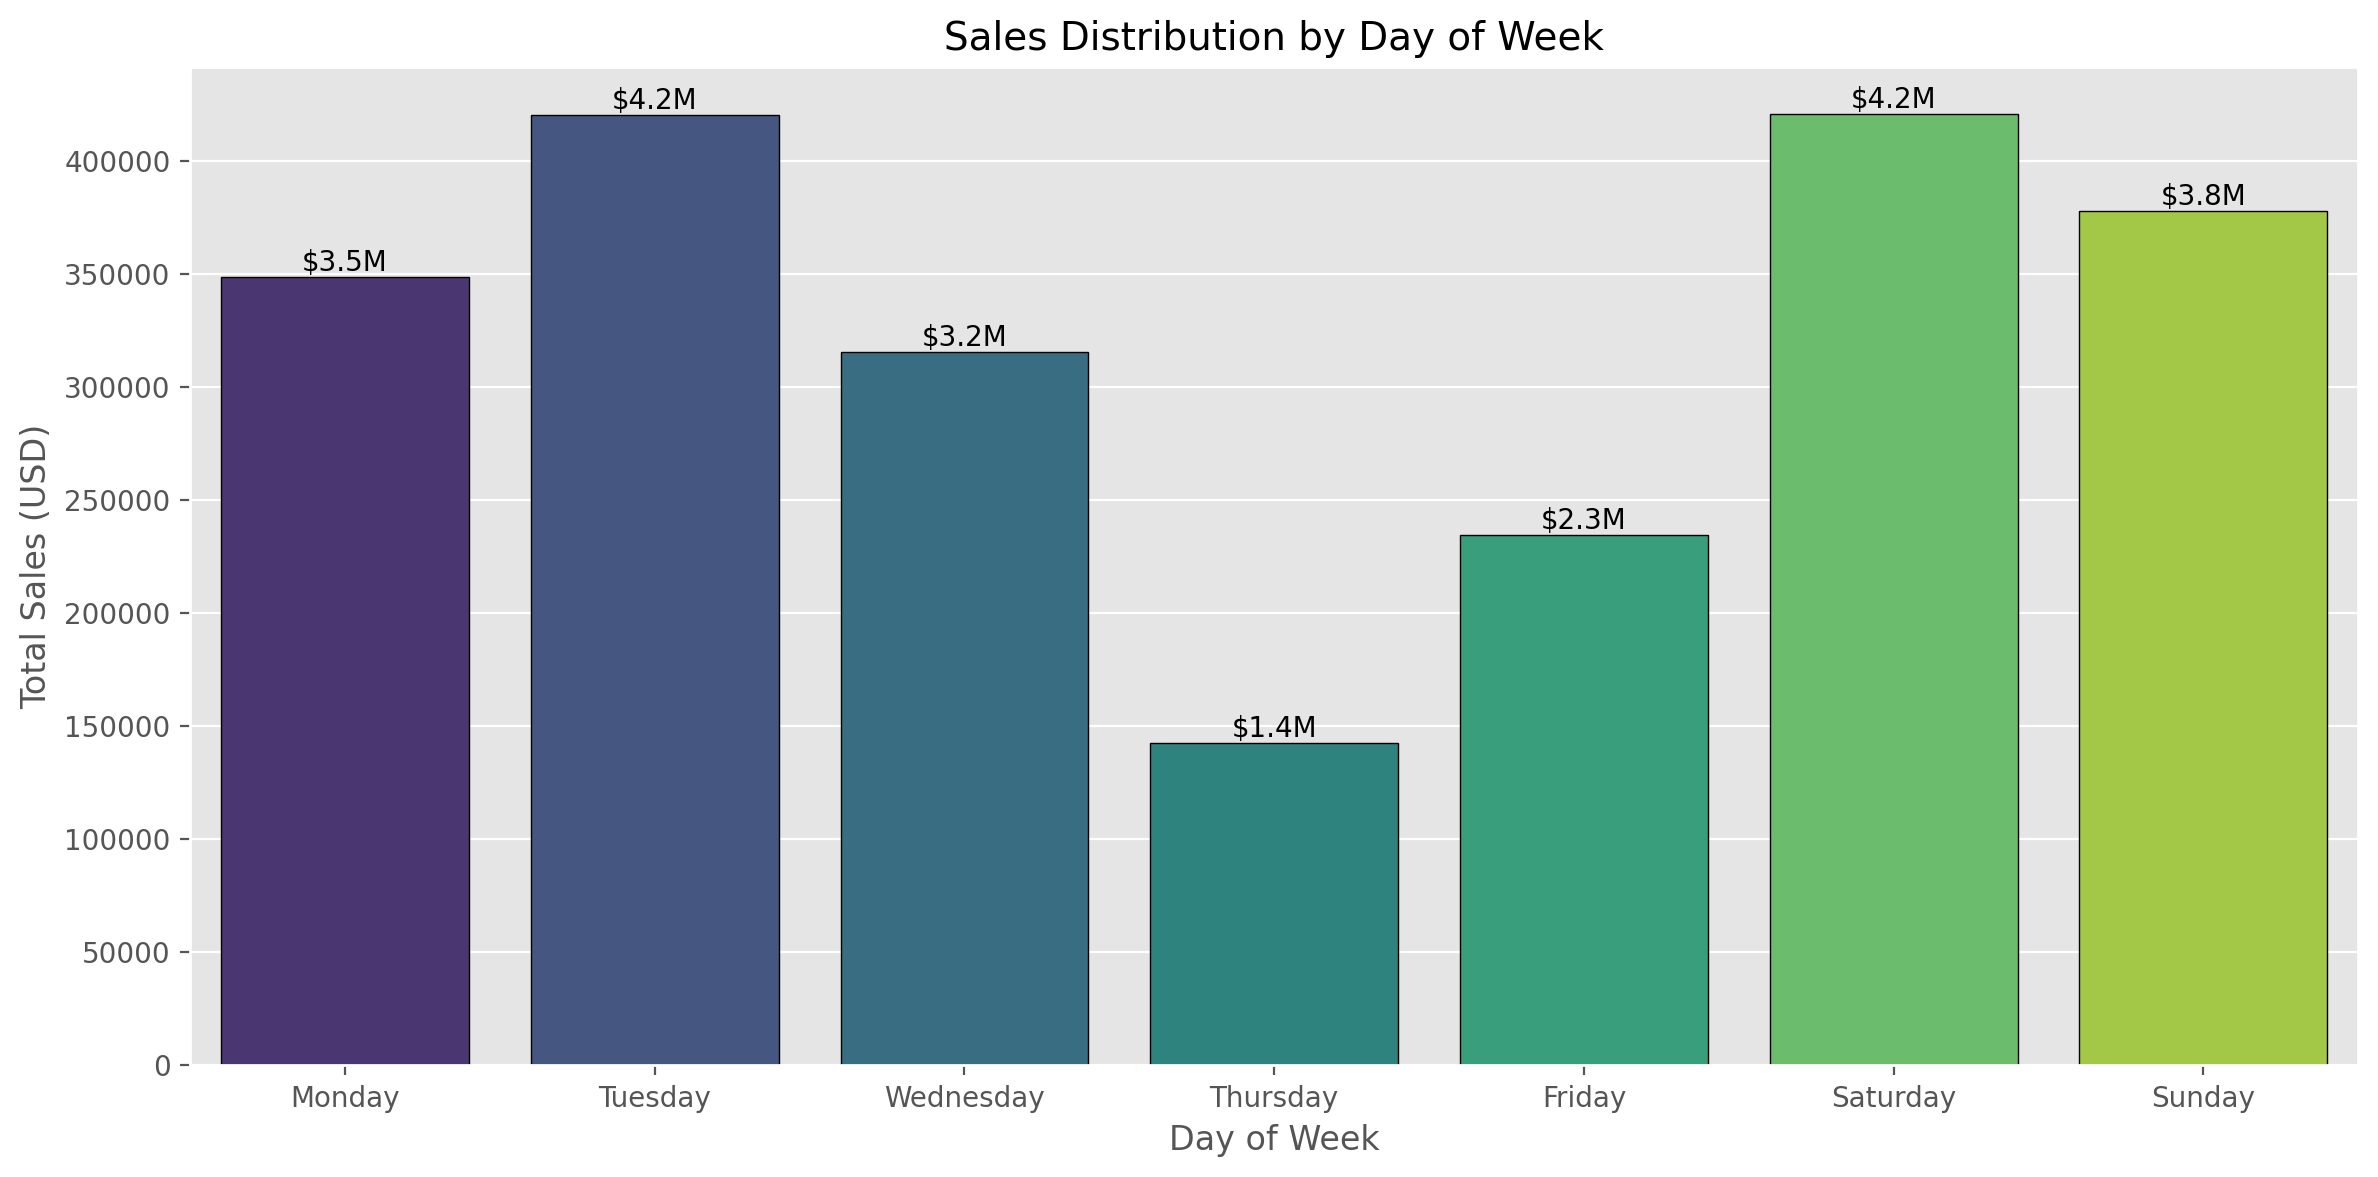

In [ ]:
# Create day-of-week analysis
dow_analysis = ts_df.groupby('Day_of_Week')['Sales'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(12, 6))
sns.barplot(x=dow_analysis.index, y=dow_analysis.values,
                   hue=dow_analysis.index, palette='viridis', edgecolor='black', legend=False)

plt.title('Sales Distribution by Day of Week', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Total Sales (USD)')

# Add value labels
for i, val in enumerate(dow_analysis.values):
    plt.text(i, val, f'${val/1e5:.1f}M', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#### 5. Month-wise Sales Pattern

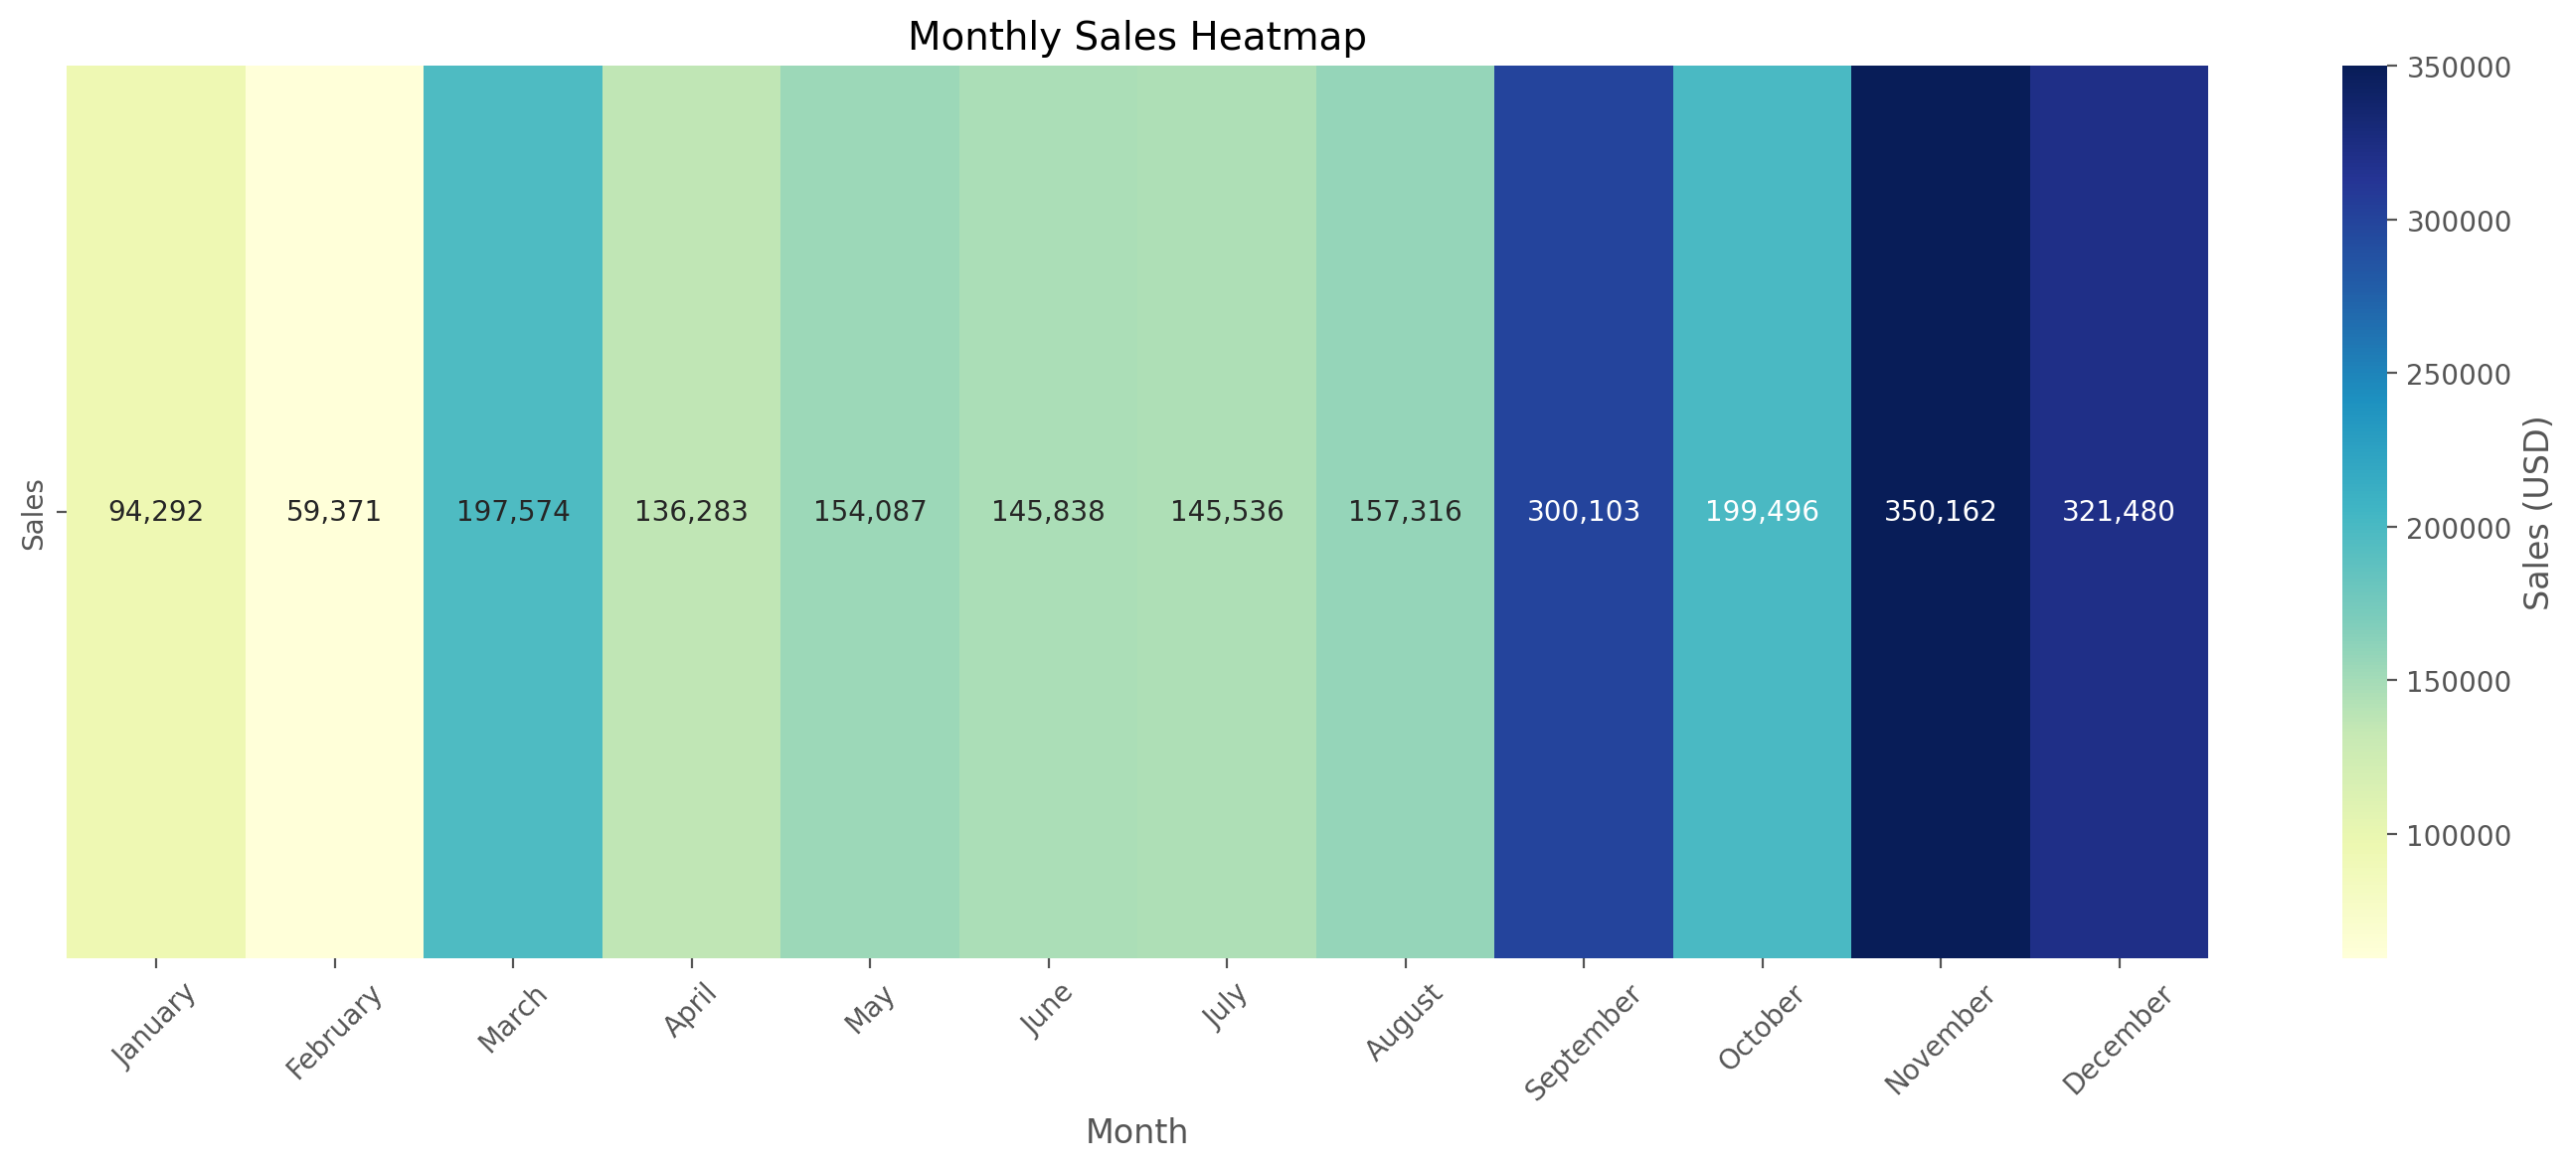

In [29]:
# Create month-wise analysis
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_analysis = ts_df.groupby('Month')['Sales'].sum().reindex(month_order)

plt.figure(figsize=(14, 6))
sns.heatmap(pd.DataFrame(month_analysis).T, 
            cmap='YlGnBu', annot=True, fmt=',.0f',
            cbar_kws={'label': 'Sales (USD)'})

plt.title('Monthly Sales Heatmap', fontsize=14)
plt.xlabel('Month')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 6. Year-over-Year Growth Analysis

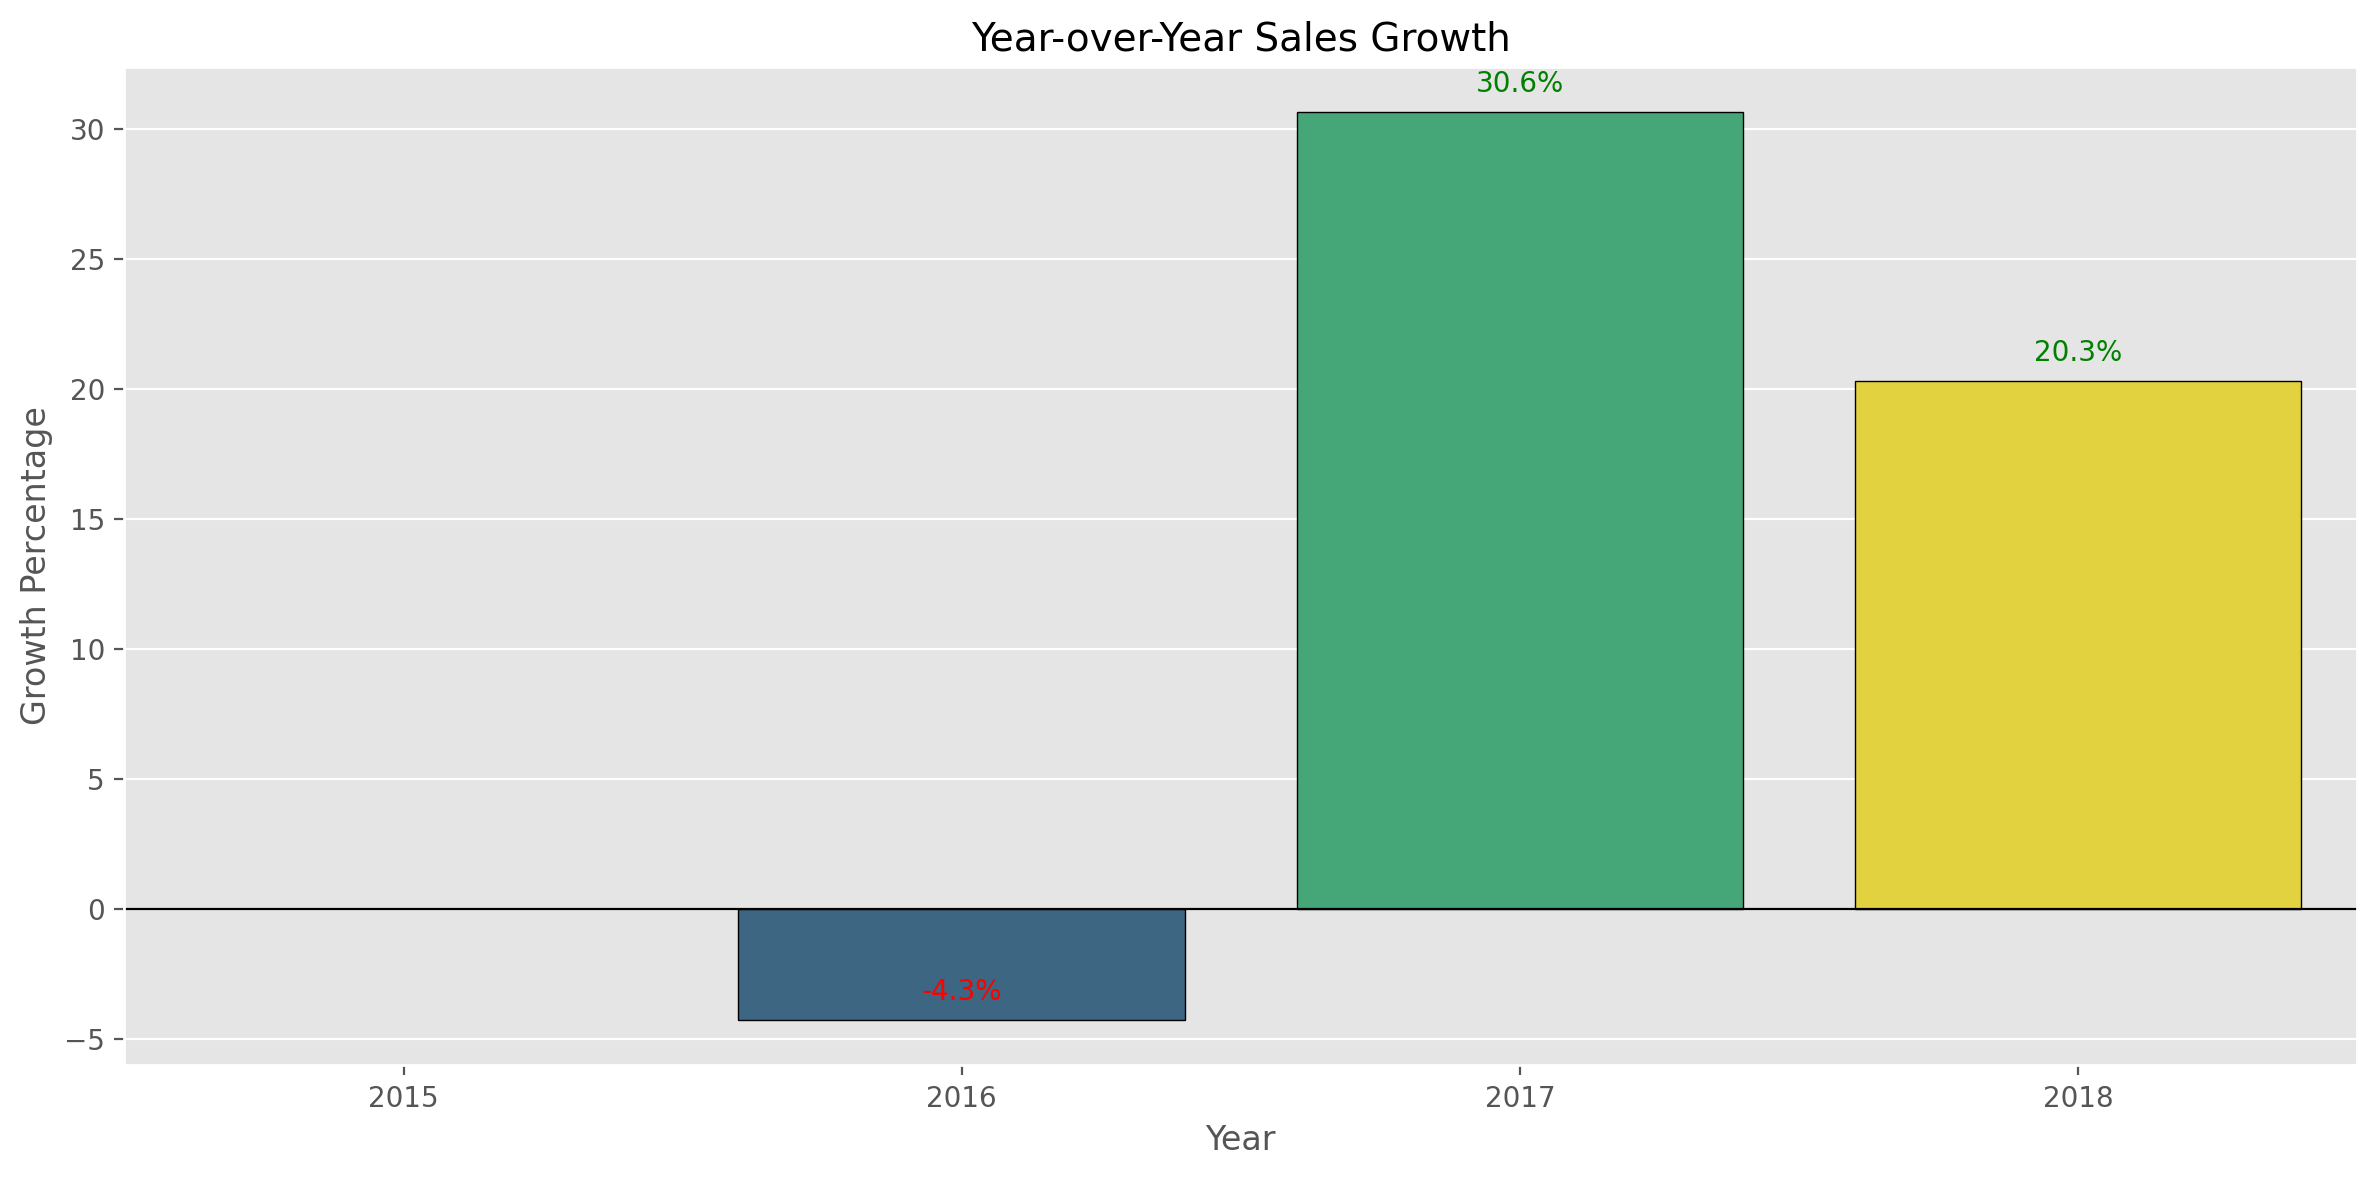

In [31]:
# Calculate YoY growth
yoy_growth = yearly_sales.pct_change() * 100

plt.figure(figsize=(12, 6))
bars = sns.barplot(x=yoy_growth.index.year, y=yoy_growth.values, 
                   hue=yoy_growth.index.year, palette='viridis', edgecolor='black', legend=False)

# Add growth percentage labels
for p in bars.patches:
    if p.get_height() > 0:
        color = 'green'
    else:
        color = 'red'
    bars.annotate(f"{p.get_height():.1f}%", 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', 
                  xytext=(0, 10), 
                  textcoords='offset points',
                  color=color,
                  fontsize=10)

plt.title('Year-over-Year Sales Growth', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Growth Percentage')
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

#### 7. Product Category Trends Over Time

<Figure size 1600x800 with 0 Axes>

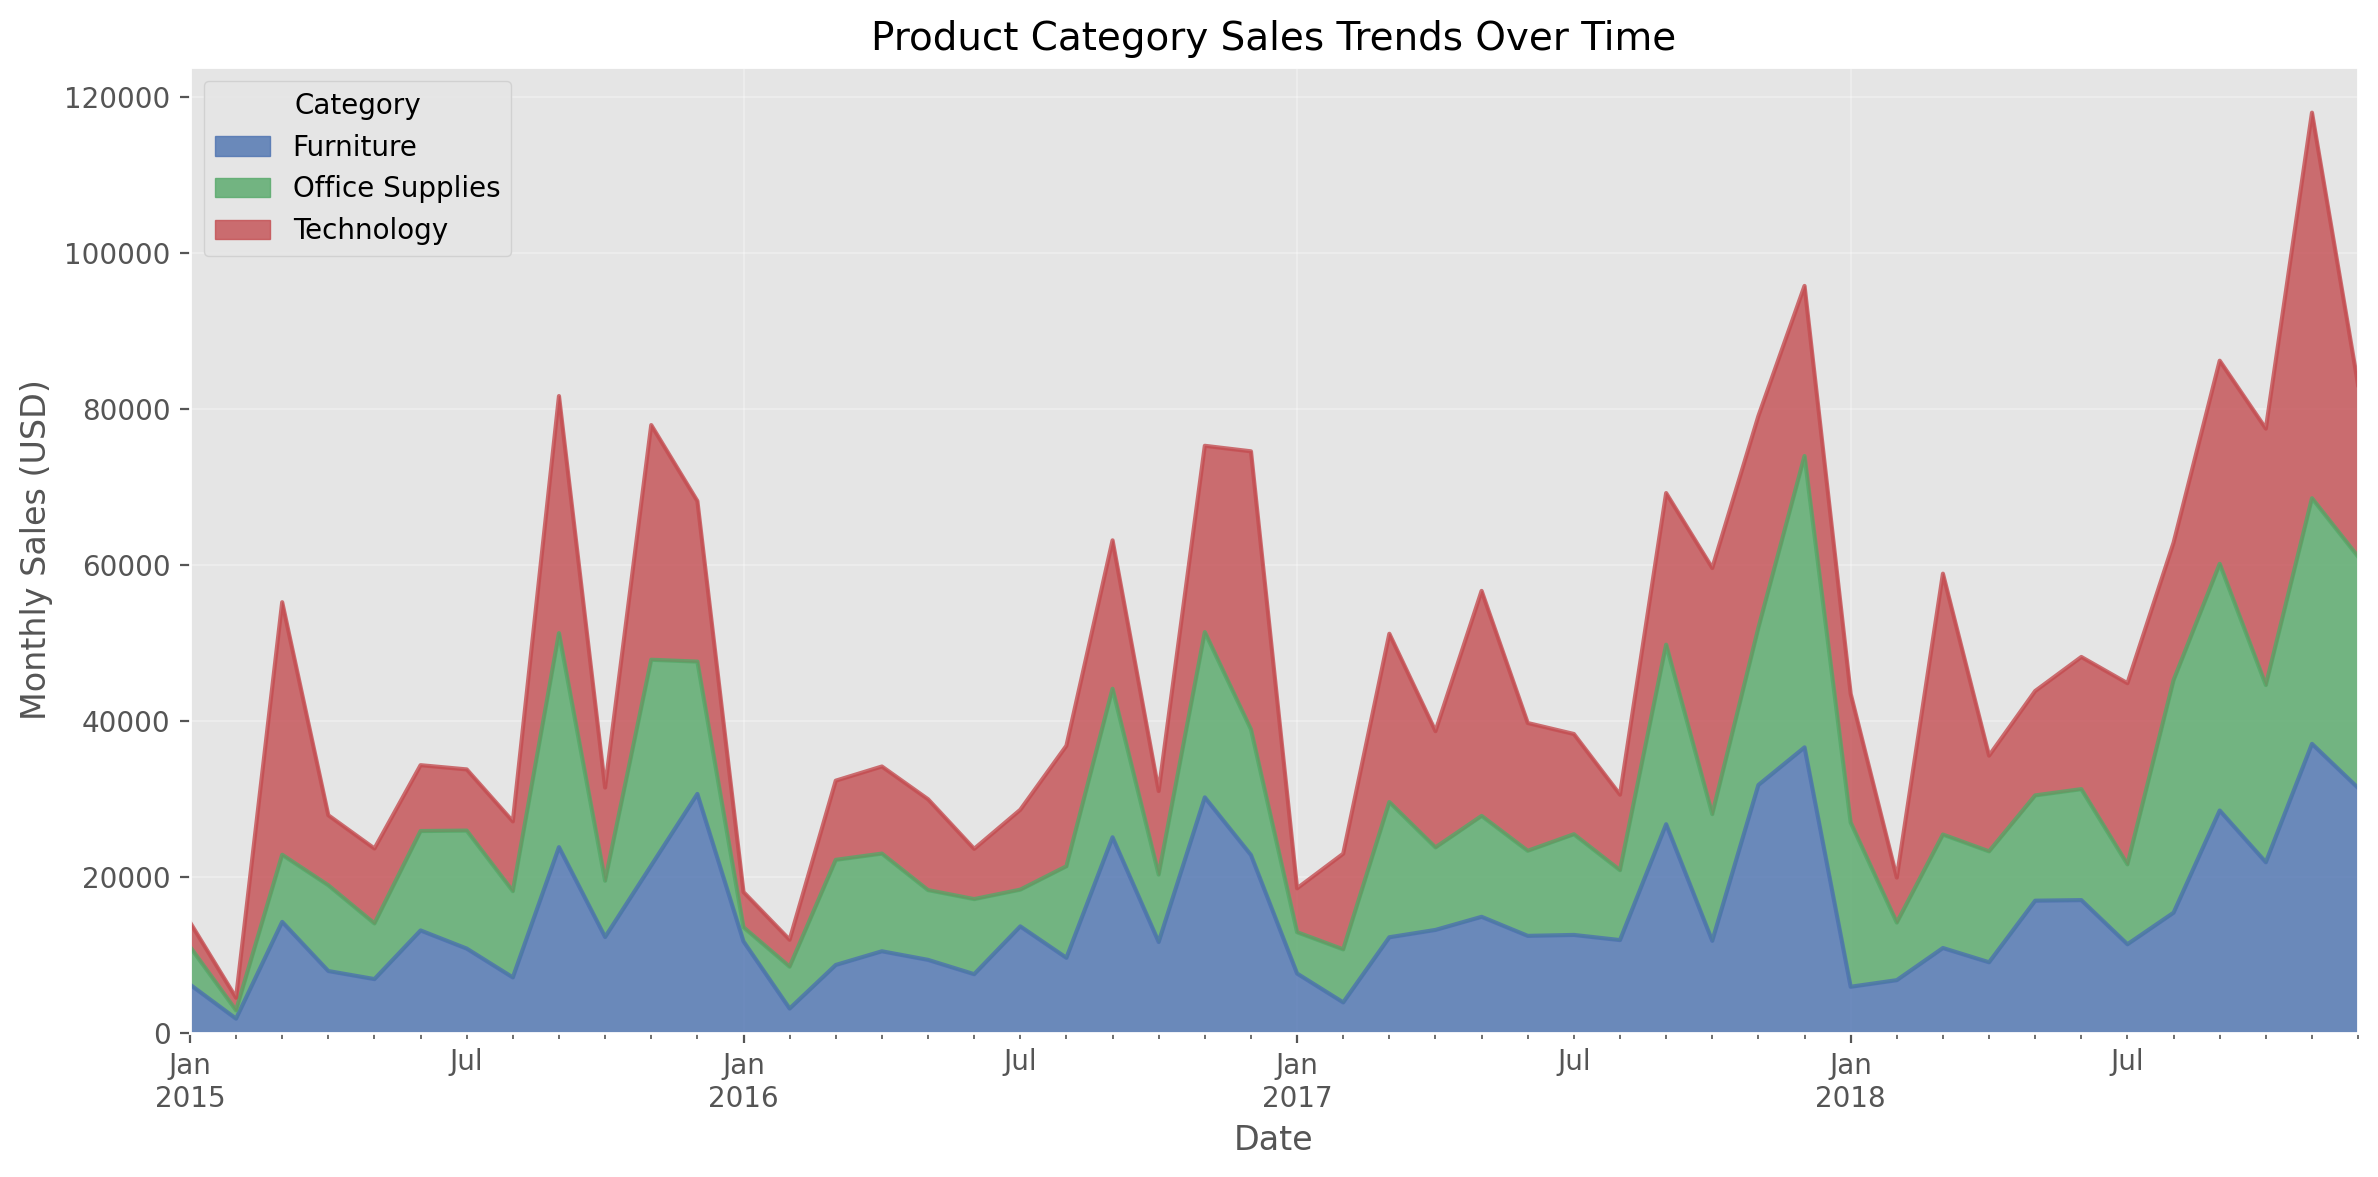

In [33]:
# Category-wise monthly trends
category_trends = ts_df.groupby([pd.Grouper(freq='ME'), 'Category'])['Sales'].sum().unstack()

plt.figure(figsize=(16, 8))
category_trends.plot(kind='area', alpha=0.8, 
                     color=['#4C72B0', '#55A868', '#C44E52'])

plt.title('Product Category Sales Trends Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Monthly Sales (USD)')
plt.legend(title='Category')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#### 8. Sales Volatility Analysis


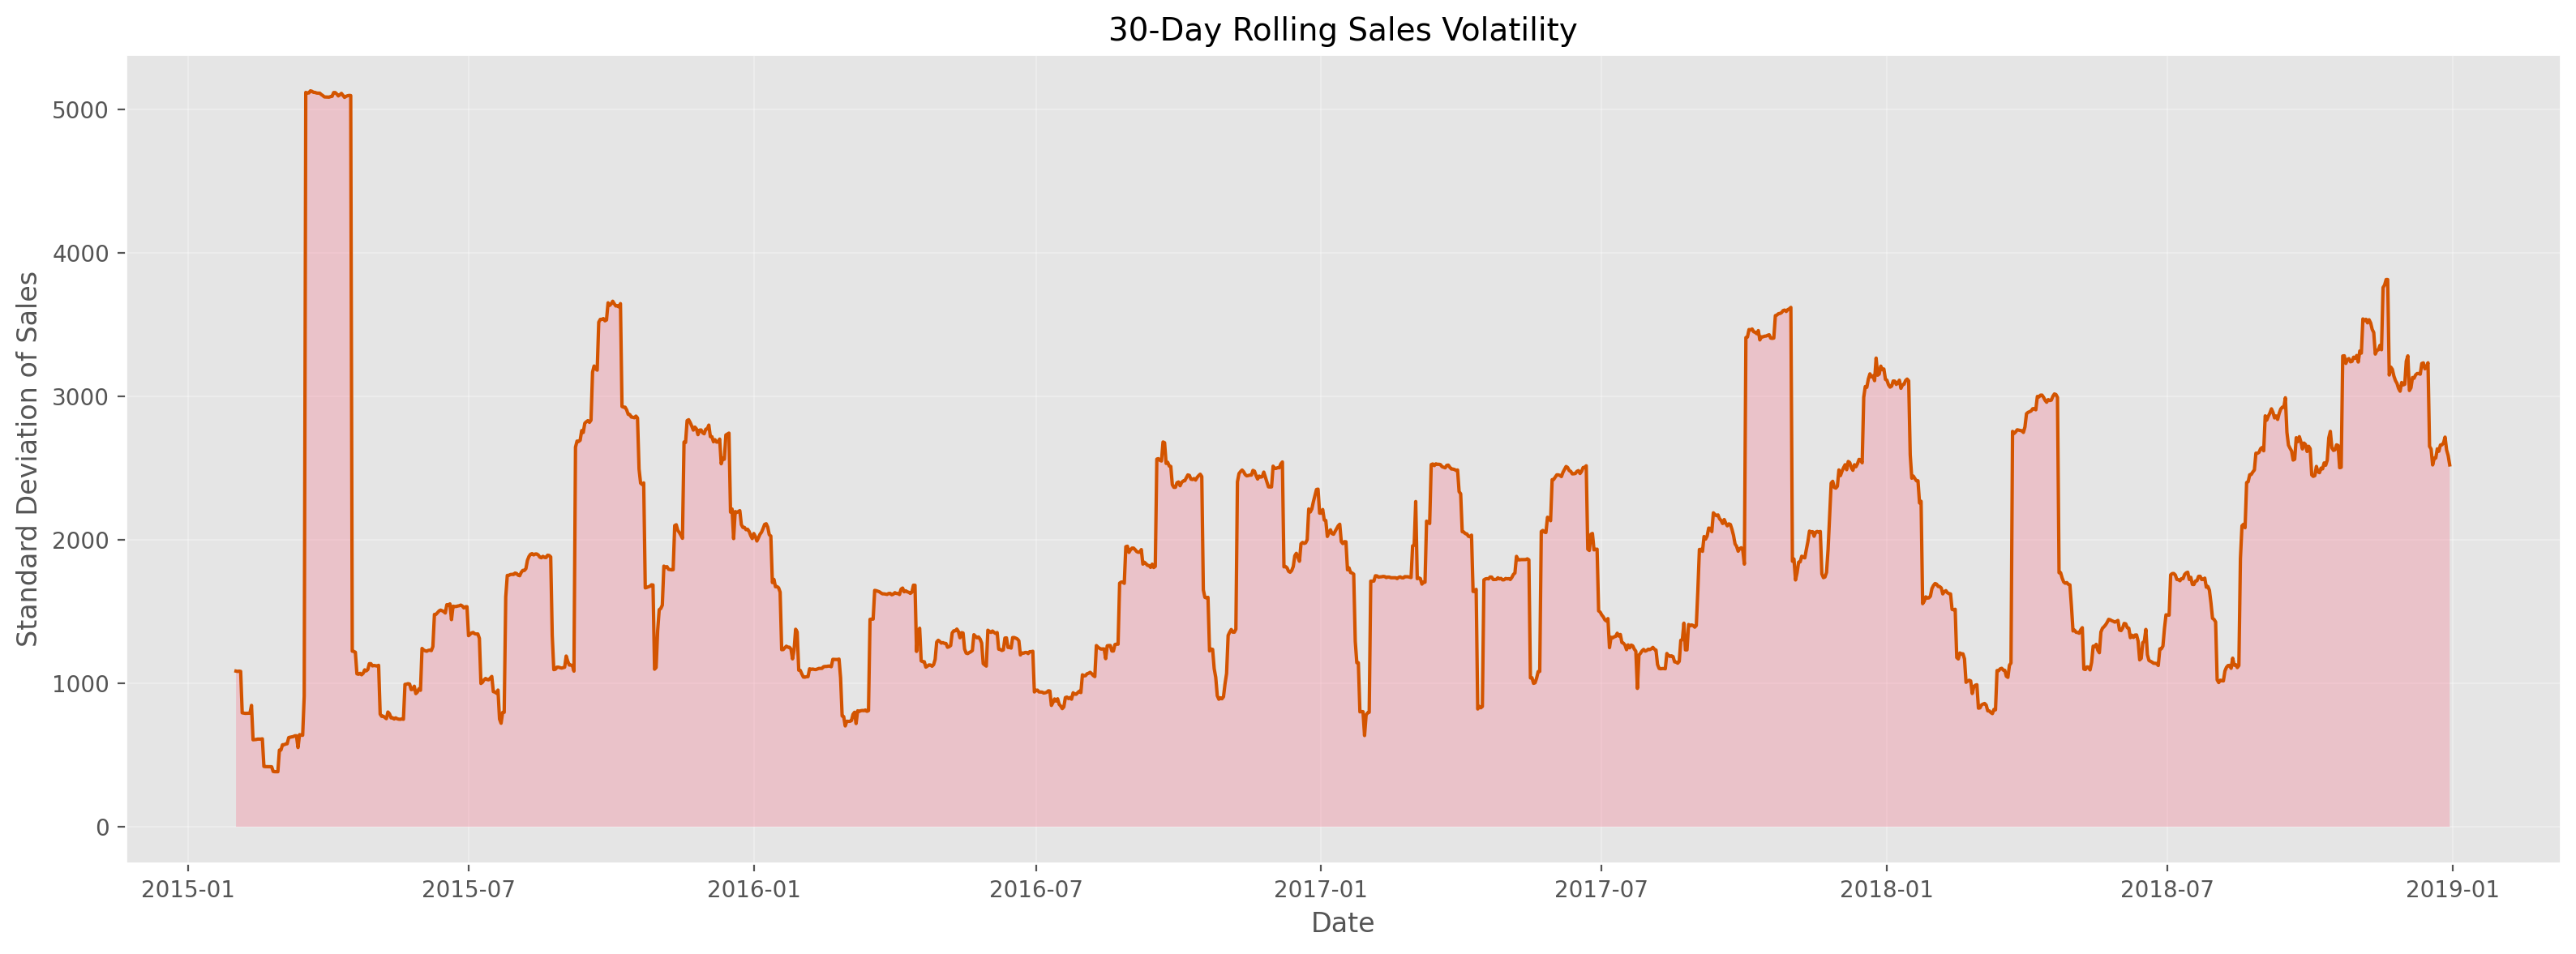

In [34]:
# Calculate 30-day rolling volatility
rolling_std = daily_sales.rolling(window=30).std()

plt.figure(figsize=(16, 6))
sns.lineplot(x=rolling_std.index, y=rolling_std.values, color='#D35400')

plt.title('30-Day Rolling Sales Volatility', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Standard Deviation of Sales')
plt.fill_between(rolling_std.index, rolling_std.values, alpha=0.3)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#### 9. Autocorrelation Analysis

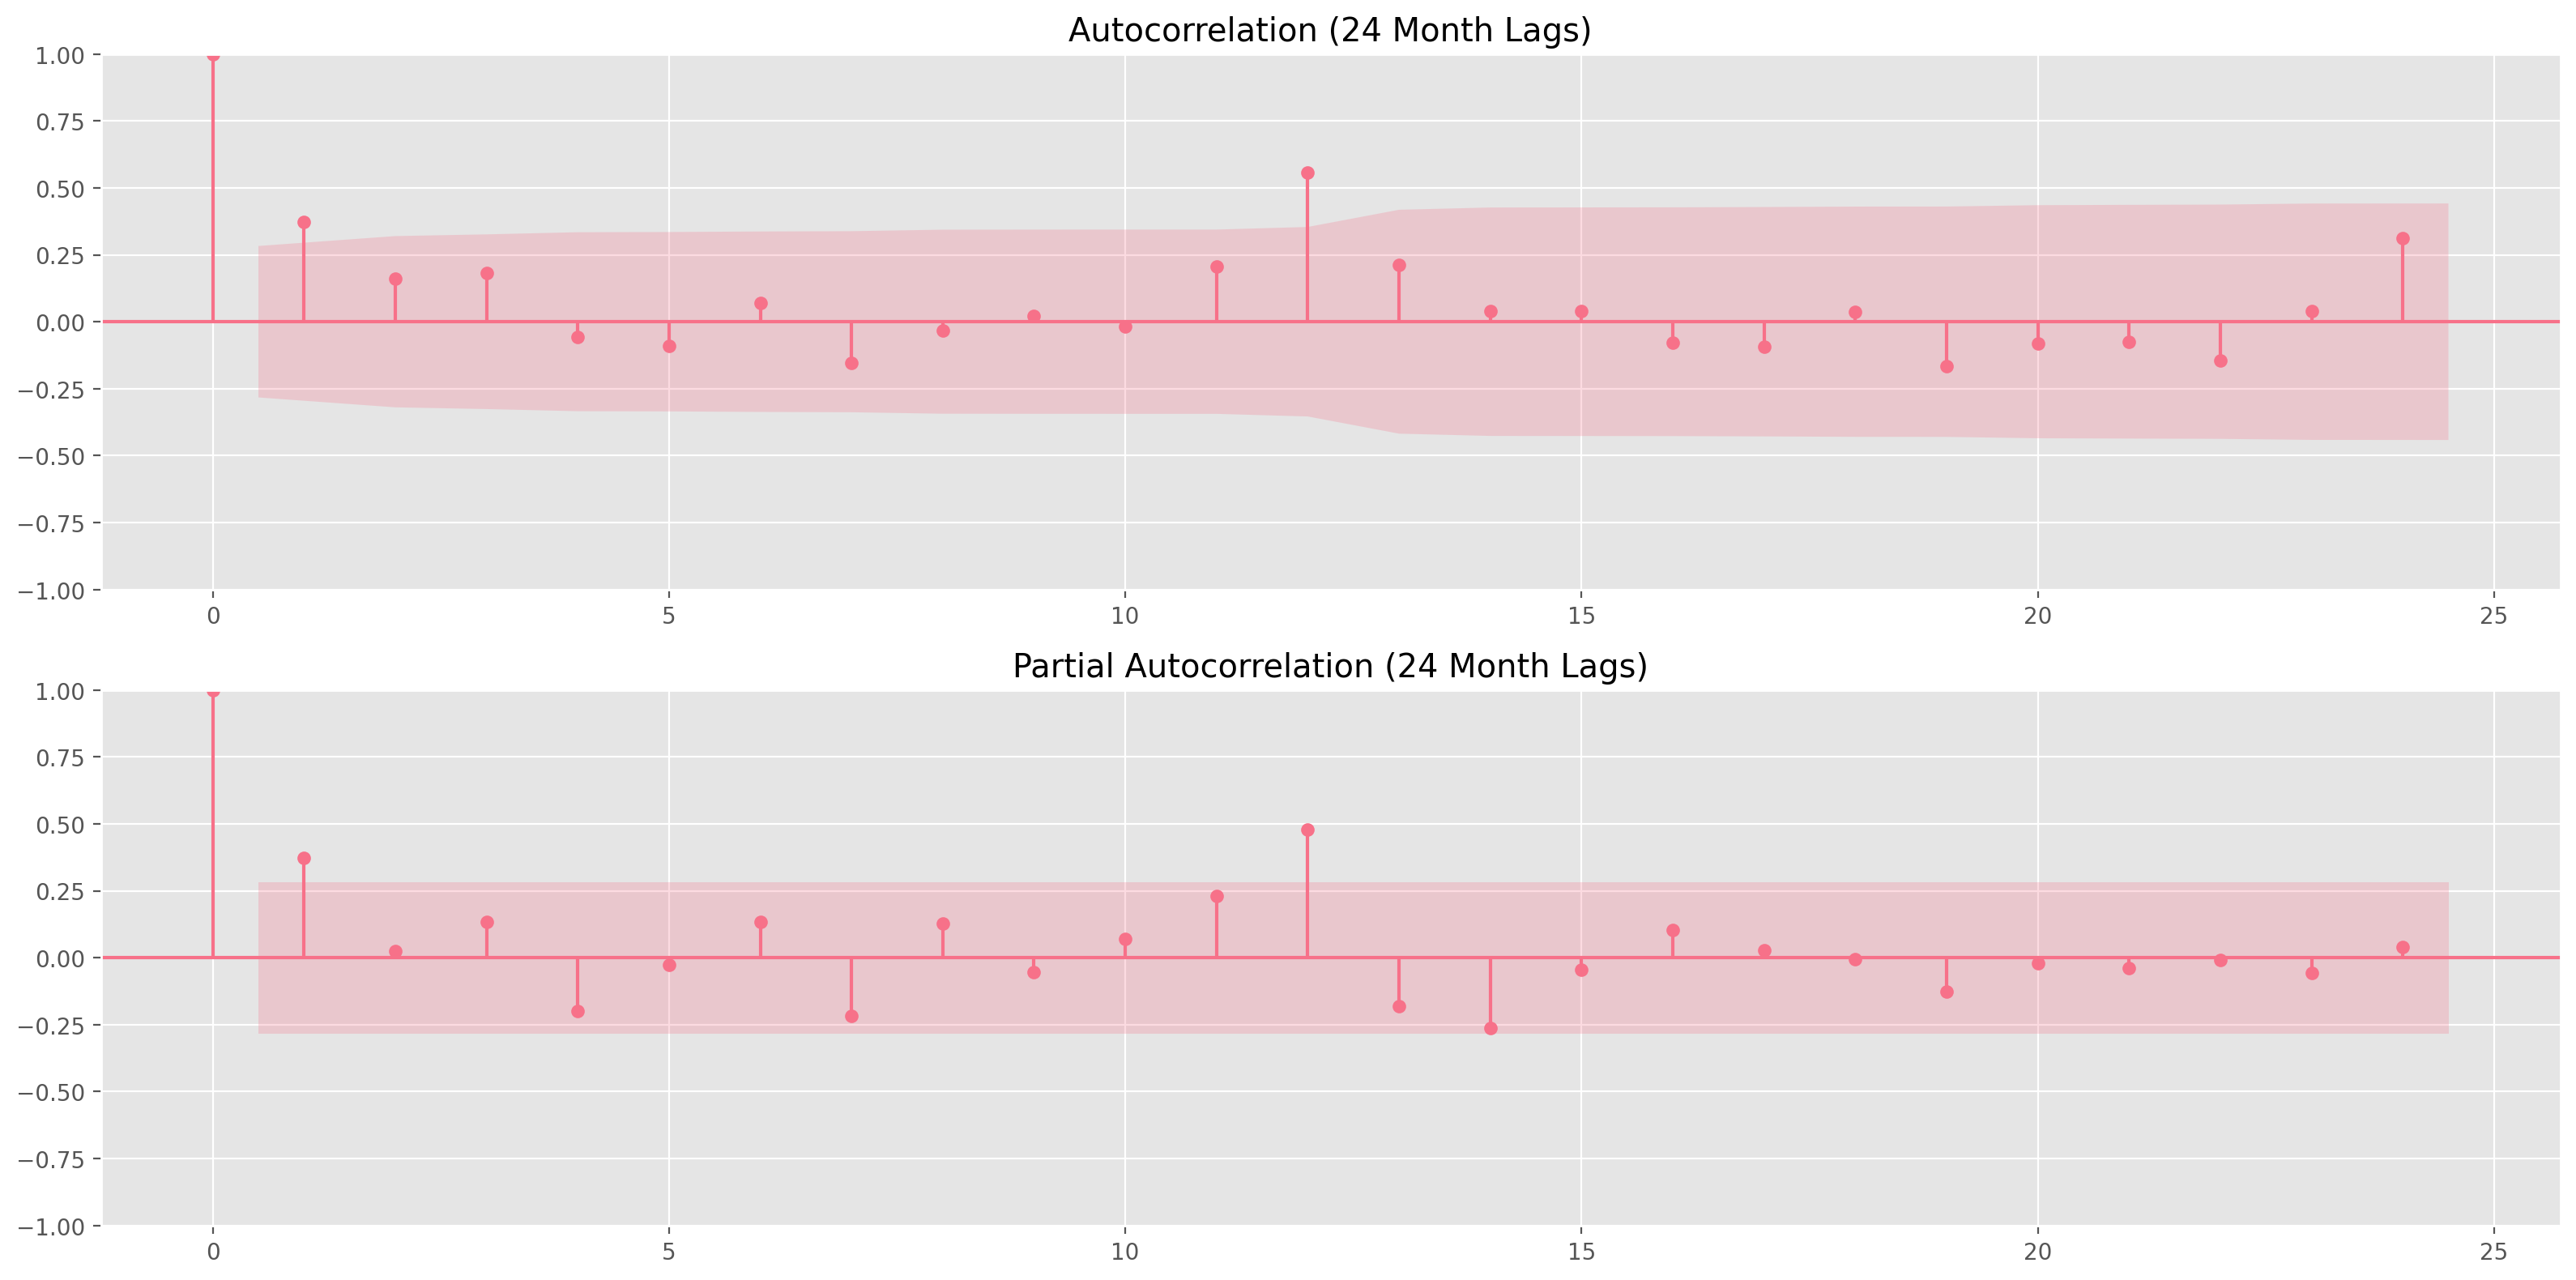

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(16, 8))

# ACF Plot
plt.subplot(211)
plot_acf(monthly_sales, lags=24, ax=plt.gca(), 
         title='Autocorrelation (24 Month Lags)')

# PACF Plot
plt.subplot(212)
plot_pacf(monthly_sales, lags=24, ax=plt.gca(), 
          title='Partial Autocorrelation (24 Month Lags)')

plt.tight_layout()
plt.show()

#### 10. Shipping Mode Trends Over Time

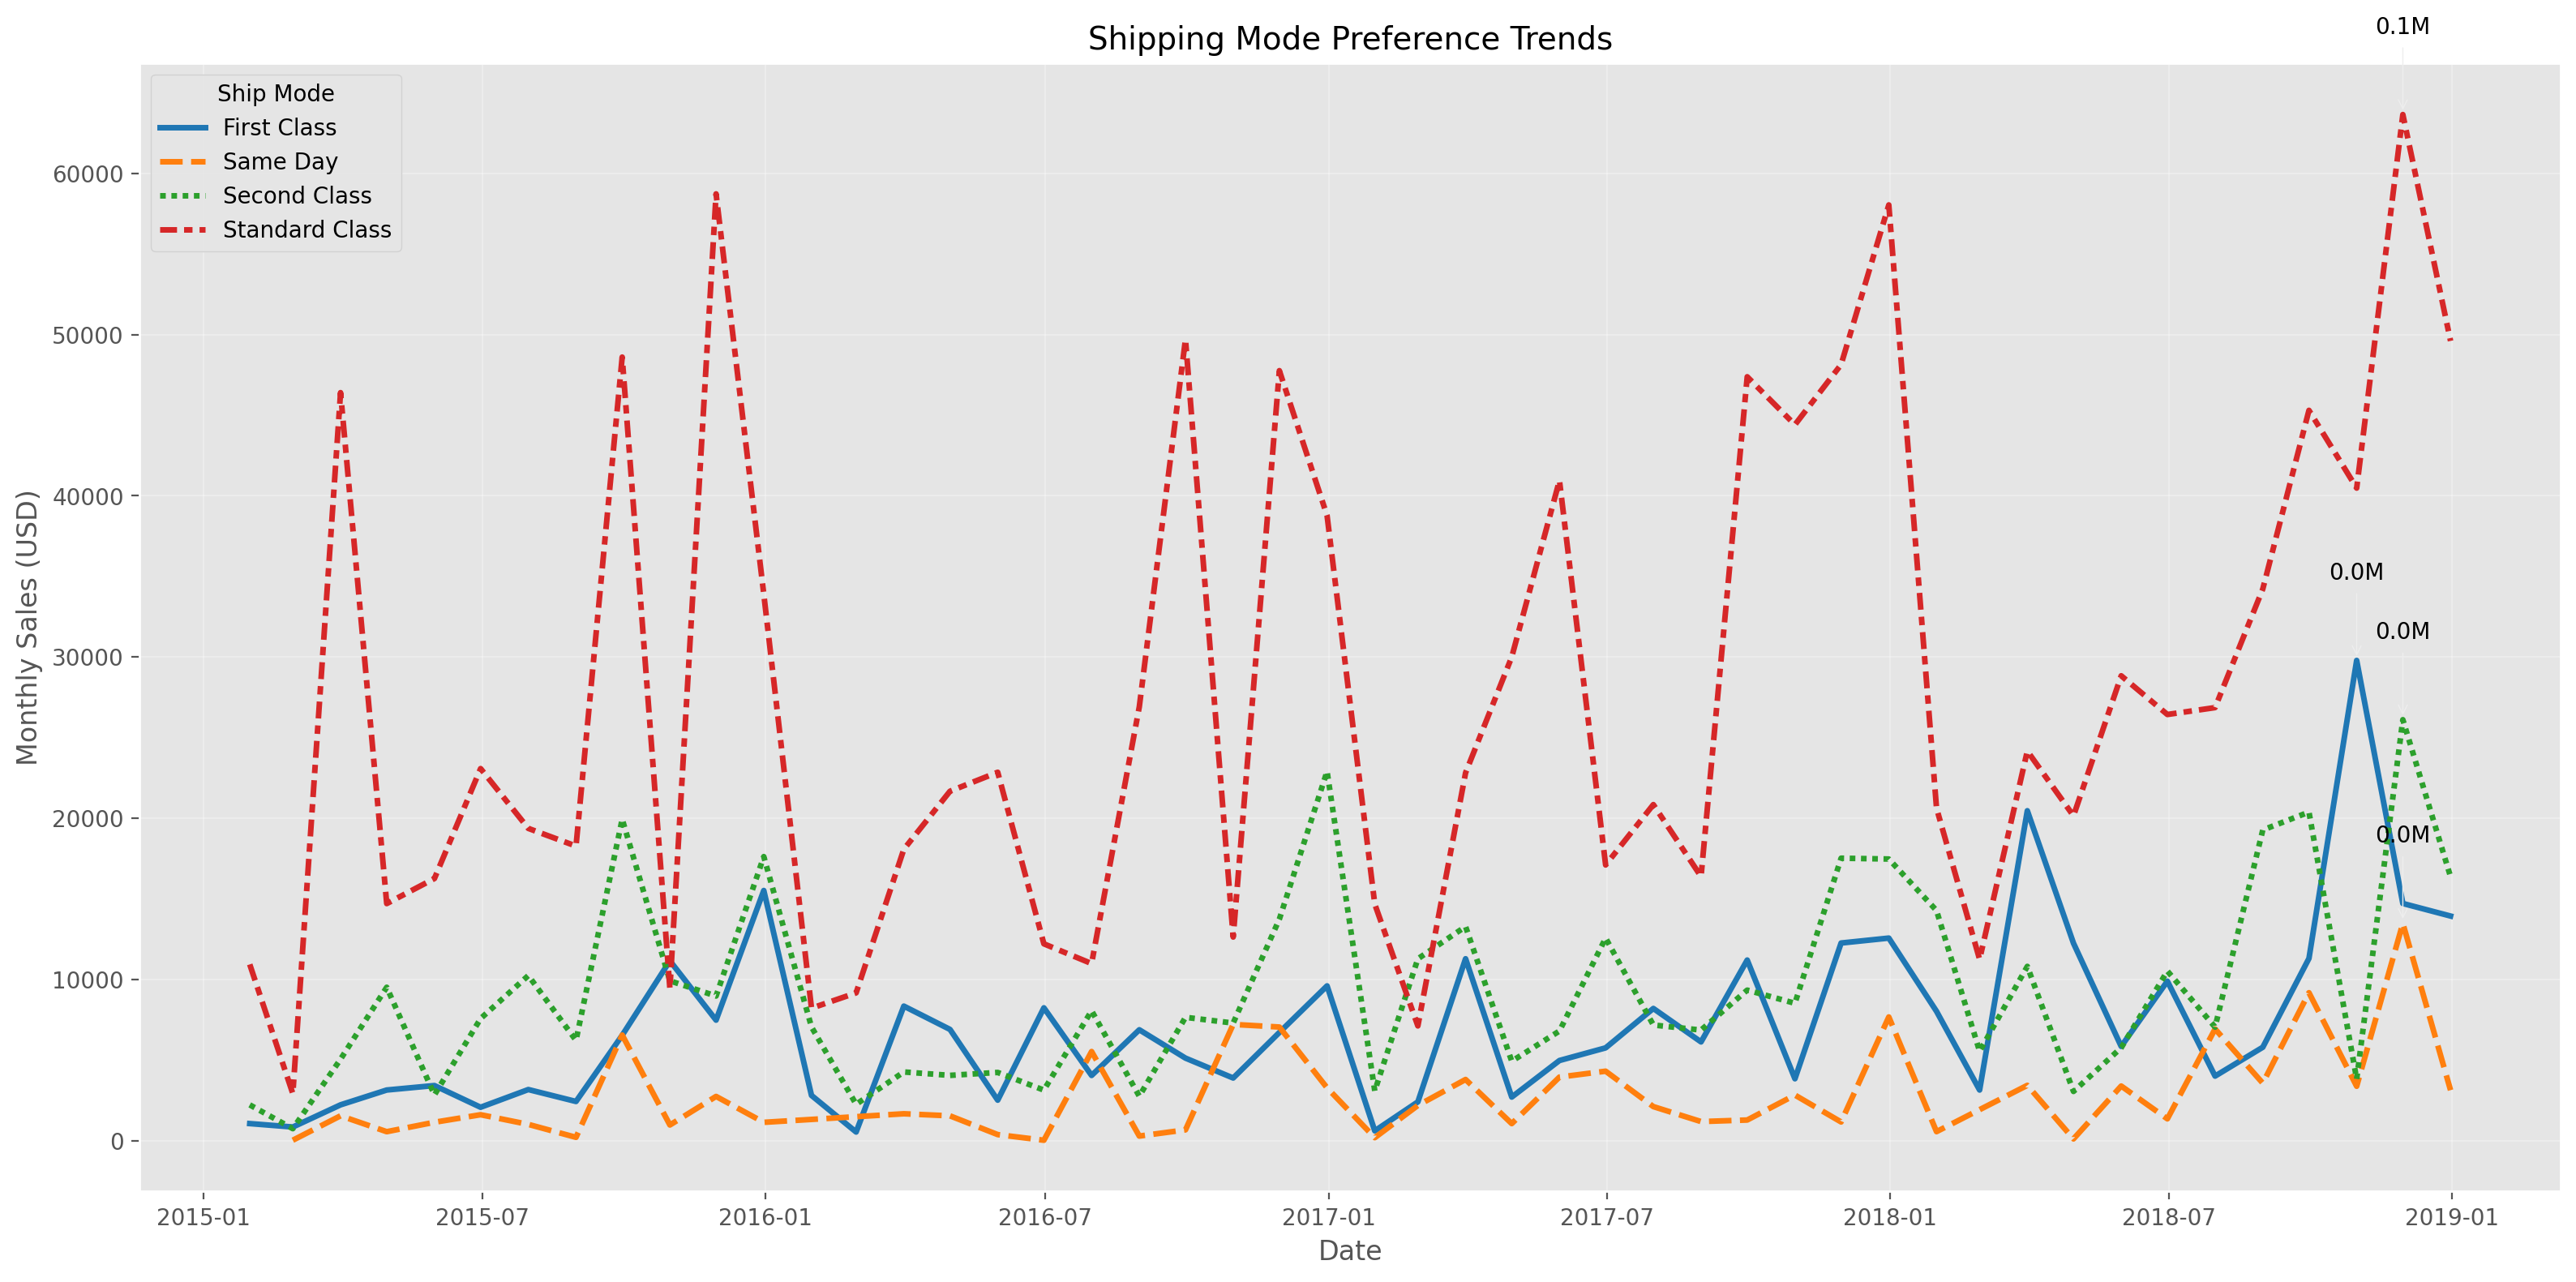

In [37]:
# Shipping mode monthly trends
shipping_trends = ts_df.groupby([pd.Grouper(freq='ME'), 'Ship Mode'])['Sales'].sum().unstack()

plt.figure(figsize=(16, 8))
sns.lineplot(data=shipping_trends, palette='tab10', linewidth=2.5)

plt.title('Shipping Mode Preference Trends', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Monthly Sales (USD)')
plt.legend(title='Ship Mode')
plt.grid(alpha=0.3)

# Annotate peaks
for mode in shipping_trends.columns:
    max_date = shipping_trends[mode].idxmax()
    max_value = shipping_trends[mode].max()
    plt.annotate(f'{max_value/1e6:.1f}M', 
                 xy=(max_date, max_value),
                 xytext=(max_date, max_value + 5000),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 horizontalalignment='center')

plt.tight_layout()
plt.show()